# Olympic Medalists

Since the beginning of the modern day Olympic Games, receiving an Olympic medal has been the pinnacle of athletic achievement. Placing in an event is not only a milestone personal accomplishment for professional athletes, but it also brings pride to the nation represented by that athlete. This section will specifically focus on athletes as individuals, evaluating their particular characteristics and comparing them to non-medalists, but the following section will dive deeper into the countries represented by medalists, analyzing how each countries' medalists have performed over time. When the modern Olympics first began in 1896, first-place finishers received a silver medal and a laurel wreath to represent their accomplishment. Starting in 1904, however, and in all the games since then, gold, silver, and bronze medals have been awarded to finishers in first, second, and third place. The artwork on these medals has changed based on the host city's location and cultural signifiers associated with that city's history, but the medal colors have remained consistent and serve as an unparalleled representation of accomplishment and victory.

In the following section, we will explore the following questions:
- What are the average characteristics of Olympic medalists?
- How have the average characteristics of Olympic medalists changed over time?
- Do characteristics of Olympic medalists differ significantly from non-medalists?
- Which individuals have received the most medals?
- Who are our youngest and oldest medalists?
- Which sports have produced the most medalists over time?

In the next section (5. Exploring Countries), we will additionally explore which countries have the highest number and proportion of medalists!

To start, we upload the cleaned dataframe from our introduction section.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('cleaned_data.csv')

In [3]:
data.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,None
1,1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,None
2,2,3,Gunnar Nielsen Aaby,M,24.0,179.0,74.0,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,None
3,3,4,Edgar Lindenau Aabye,M,34.0,179.0,74.0,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,None


For use in our analysis of medalist height, weight, and age, it will be important to have dataframes without the missing values already filled with the median for each characteristic. Thus, below we also upload the original data prior to scrubbing.

In [4]:
nonnull_data = pd.read_csv('athlete_events.csv')

In [5]:
nonnull_data.isna().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

We do want the null values in the Medal feature to indicate the lack of a gold, silver, or bronze medal, so, once again, we fill these with "None".

In [6]:
nonnull_data.Medal.fillna("None",inplace=True)

In [7]:
nonnull_data[nonnull_data.Weight.isna()==True].groupby('Year').count()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Season,City,Sport,Event,Medal
Year,,,,,,,,,,,,,,
1896,331,331,331,171,3,0,331,331,331,331,331,331,331,331
1900,1857,1857,1857,1069,44,0,1857,1857,1857,1857,1857,1857,1857,1857
1904,1154,1154,1154,888,91,0,1154,1154,1154,1154,1154,1154,1154,1154
1906,1528,1528,1528,786,55,0,1528,1528,1528,1528,1528,1528,1528,1528
1908,2618,2618,2618,1994,98,0,2618,2618,2618,2618,2618,2618,2618,2618
1912,3444,3444,3444,3295,163,0,3444,3444,3444,3444,3444,3444,3444,3444
1920,3821,3821,3821,2984,334,0,3821,3821,3821,3821,3821,3821,3821,3821
1924,5003,5003,5003,3911,387,0,5003,5003,5003,5003,5003,5003,5003,5003
1928,4856,4856,4856,3915,296,0,4856,4856,4856,4856,4856,4856,4856,4856


In the cell above, we see that while the majority of missing values for weight are from games prior to 1964, null values exist for some athletes in all the games. It is assumed that the same trends exist for age and height as well. The reason for this lack of information is unknown but for the sake of our analysis we will create new dataframes age, height, and weight in which rows with missing values are dropped from the data. From these dataframes, we will separate each into athletes who recieved medals and those that did not, so that we are able to compare each of these subgroups' characteristics.

In [8]:
nonnull_age = nonnull_data.drop(nonnull_data[nonnull_data['Age'].isna()==True].index)
nonnull_weight = nonnull_data.drop(nonnull_data[nonnull_data['Weight'].isna()==True].index)
nonnull_height = nonnull_data.drop(nonnull_data[nonnull_data['Height'].isna()==True].index)

In [9]:
nonnull_medalist_age = nonnull_age[nonnull_age.Medal != 'None']
nonnull_nonmedalist_age = nonnull_age[nonnull_age.Medal == 'None']

nonnull_medalist_height = nonnull_height[nonnull_height.Medal != 'None']
nonnull_nonmedalist_height = nonnull_height[nonnull_height.Medal == 'None']

nonnull_medalist_weight = nonnull_weight[nonnull_weight.Medal != 'None']
nonnull_nonmedalist_weight = nonnull_weight[nonnull_weight.Medal == 'None']

## What are the average characteristics of Olympic medalists?

We also create a dataframe for all the Olympic medalists, so that we can describe their average characteristics in the cells following.

In [10]:
medalist_data = data[data.Medal != 'None']

In [11]:
medalist_data.describe()

,Unnamed: 0,ID,Age,Height,Weight,Year
count,39783.000000,39783.000000,39783.000000,39783.000000,39783.000000,39783.000000
mean,137874.605837,69407.051806,25.889752,177.656486,73.484725,1973.943845
std,77931.301911,38849.980737,5.865073,9.740243,13.322425,33.822857
min,3.000000,4.000000,10.000000,136.000000,28.000000,1896.000000
25%,71691.500000,36494.000000,22.000000,172.000000,65.000000,1952.000000
50%,137226.000000,68990.000000,25.000000,179.000000,74.000000,1984.000000
75%,206096.500000,103461.500000,29.000000,183.000000,79.000000,2002.000000
max,271103.000000,135563.000000,73.000000,223.000000,182.000000,2016.000000


Based on the descriptive data above, we see that athletes' characteristics differ substantially. While the average age is nearly 26 years old, medalists have been as young as 10 years and as old as 73 years. The average height is 177.66 cm but ranges from 136 to 223 cm. Medalist weight, with an average of 73.48 kg, also varies from 13 to 182 kg. The difference in these characteristics most likely comes from the differences in each particular event. What benefits athletes in one event may hinder them in another. No one body type and structure will prevail in every sport across the Olympic Games. However, below, we will explore the age, weight, and height distributions for Olympic Medalists.

Text(0, 0.5, 'Number of Medalists')

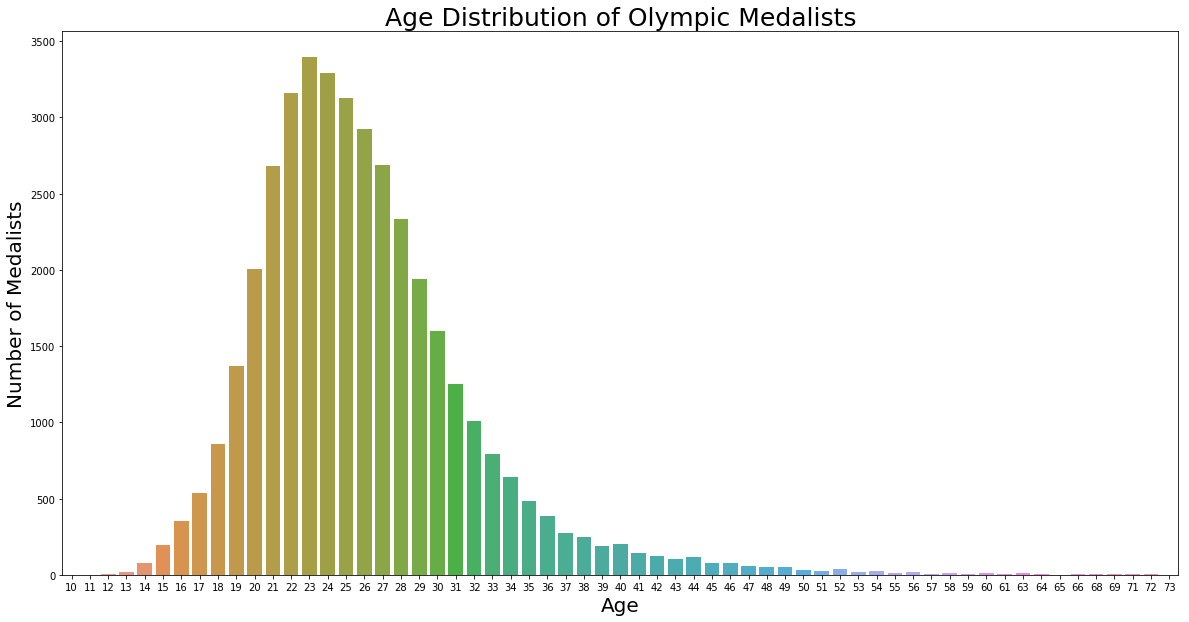

In [40]:
plt.figure(figsize=(20, 10))
sns.countplot(nonnull_medalist_age['Age'].astype(int))
plt.title('Age Distribution of Olympic Medalists',size=25)
plt.xlabel('Age',size=20)
plt.ylabel('Number of Medalists',size=20)

The plot above displays the age distribution for all Olympic medalists since 1896. As is evident by the distribution, the majority of medalists are below the age of 30, clustered primarily around ages 22-26. However, the distribution is skewed right, with many outliers at high ages, and several extraordinarly young medalists as well.

Text(0, 0.5, 'Height')

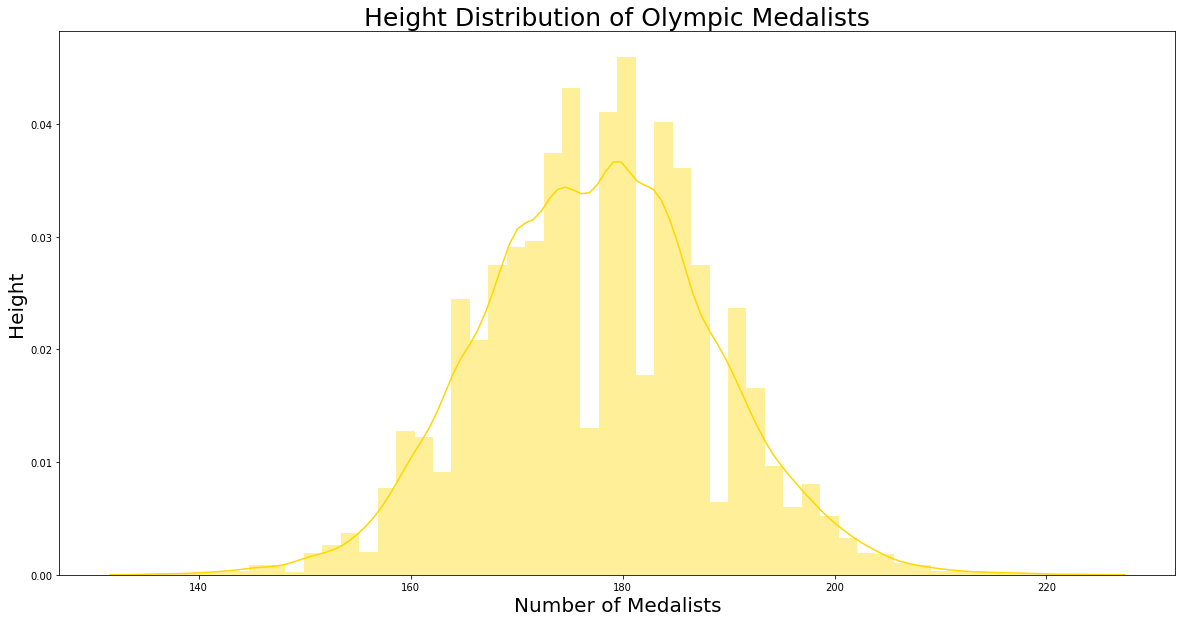

In [43]:
plt.figure(figsize=(20, 10))
sns.distplot(nonnull_medalist_height['Height'],color='gold')
plt.title('Height Distribution of Olympic Medalists',size=25)
plt.xlabel('Number of Medalists',size=20)
plt.ylabel('Height',size=20)

The plot above illustrates the heights of all Olympic athletes since 1896. While some gaps in the ages exist around 177, 182, and 190 cm, the distribution remains relatively normal and appears, at first glance, to be fairly comparable to the height distribution we saw in an earlier section for all athletes' heights. Below, we will be able to compare the distributions for medalists and nonmedalists and see if any trends exist.

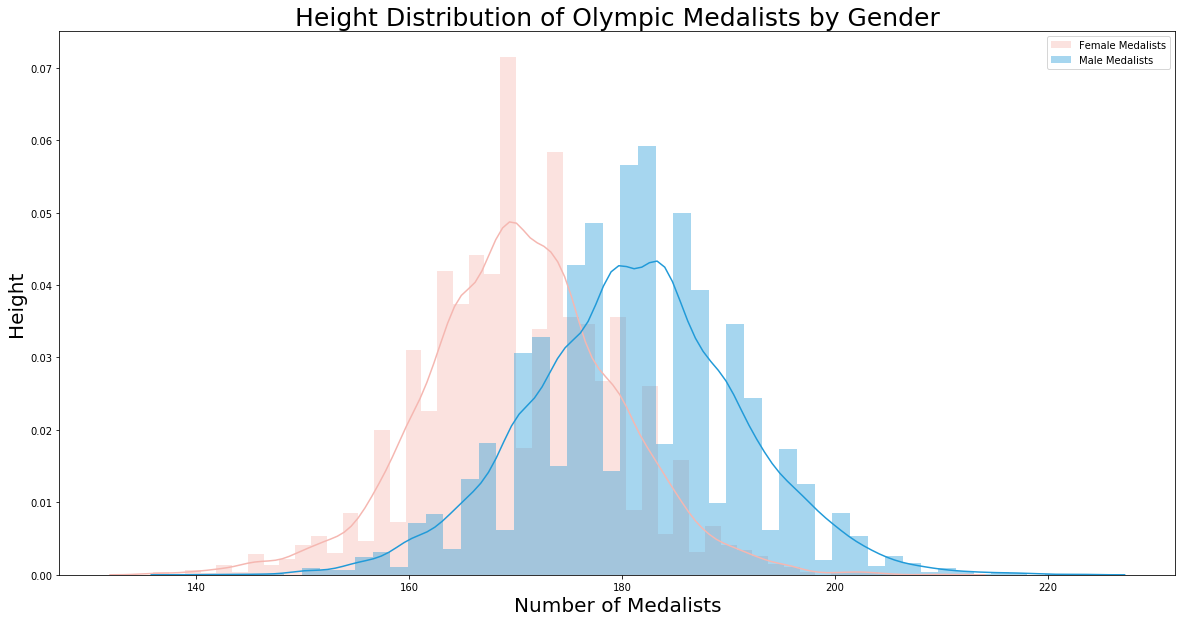

In [53]:
plt.figure(figsize=(20, 10))
sns.distplot(nonnull_medalist_height[nonnull_medalist_height['Sex']=='F']['Height'],
             color='#F5B7B1',label='Female Medalists')
sns.distplot(nonnull_medalist_height[nonnull_medalist_height['Sex']=='M']['Height'],
             color='#219AD8',label='Male Medalists')
plt.title('Height Distribution of Olympic Medalists by Gender',size=25)
plt.xlabel('Number of Medalists',size=20)
plt.ylabel('Height',size=20)
plt.legend()

The above plot demonstrates the differences in height distributions for male and female medalists, reminding us that many factors that affect an athlete's ability to medal differ based on gender, sport, and even the location of the games relative to their homecountry. We will attempt to explore some of these factors in more detail throughout the remainder of the section.

Text(0, 0.5, 'Weight')

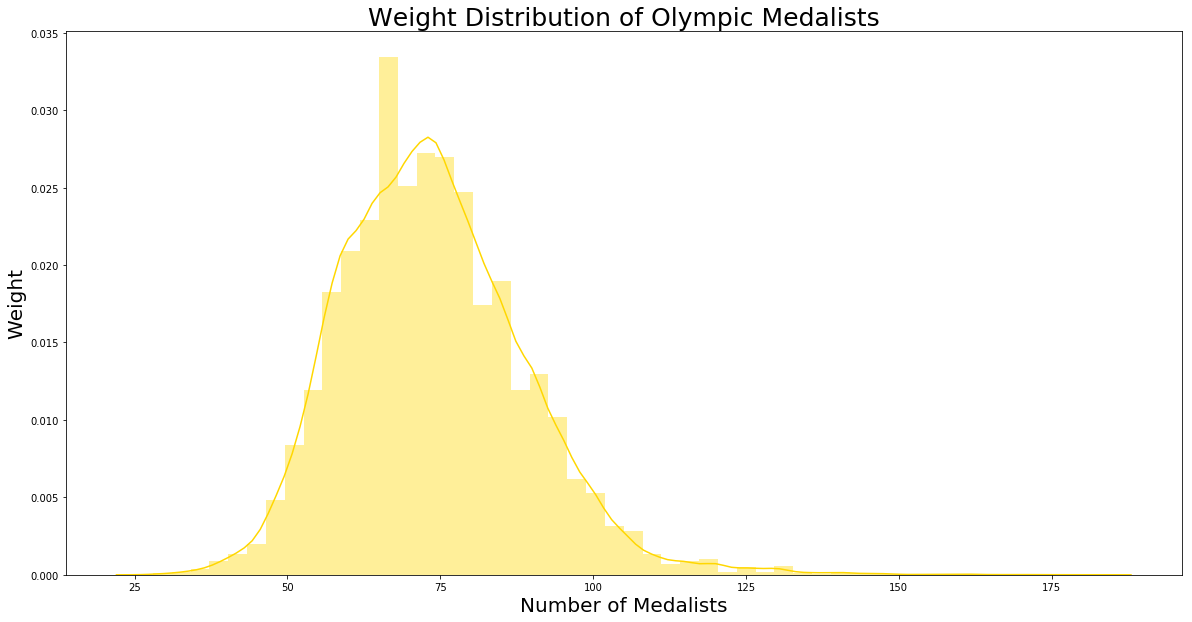

In [52]:
plt.figure(figsize=(20, 10))
sns.distplot(nonnull_medalist_weight['Weight'],color='gold')
plt.title('Weight Distribution of Olympic Medalists',size=25)
plt.xlabel('Number of Medalists',size=20)
plt.ylabel('Weight',size=20)

The plot above illustrates the weights of all Olympic athletes since 1896. This distribution appears more consistently normal the the above one for height, although with more high outliers present than for height, Similarly, however, this distribution also appears, at first glance, to be fairly comparable to the weight distribution we saw in an earlier section for all athletes' weights. Below, we will be able to compare the distributions for medalists and nonmedalists and see if any trends exist.

Text(0, 0.5, 'Weight')

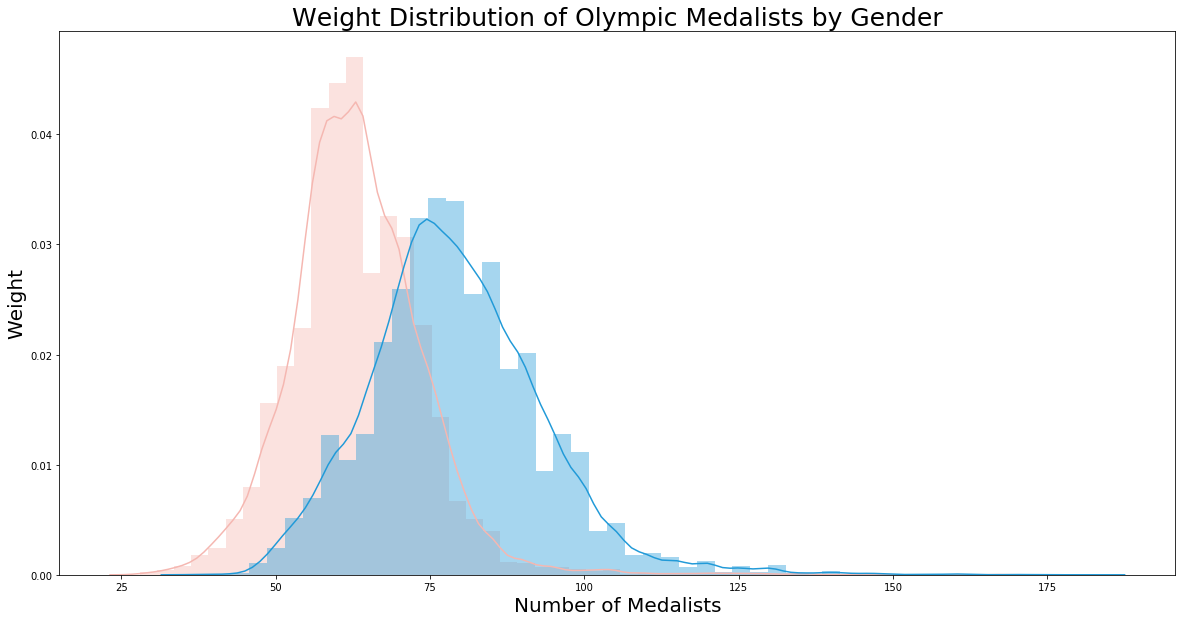

In [55]:
plt.figure(figsize=(20, 10))
sns.distplot(nonnull_medalist_weight[nonnull_medalist_weight.Sex=='F']['Weight'],
            color='#F5B7B1',label='Female Medalists')
sns.distplot(nonnull_medalist_weight[nonnull_medalist_weight.Sex=='M']['Weight'],
             color='#219AD8',label='Male Medalists')
plt.title('Weight Distribution of Olympic Medalists by Gender',size=25)
plt.xlabel('Number of Medalists',size=20)
plt.ylabel('Weight',size=20)

The above plot demonstrates the differences in weight distributions for male and female medalists. Explore more about gender differences across the modern Olympic Games in the prior section (2. Gender)!

Text(0.5, 1.0, 'Height-Weight Correlation of Olympic Medalists')

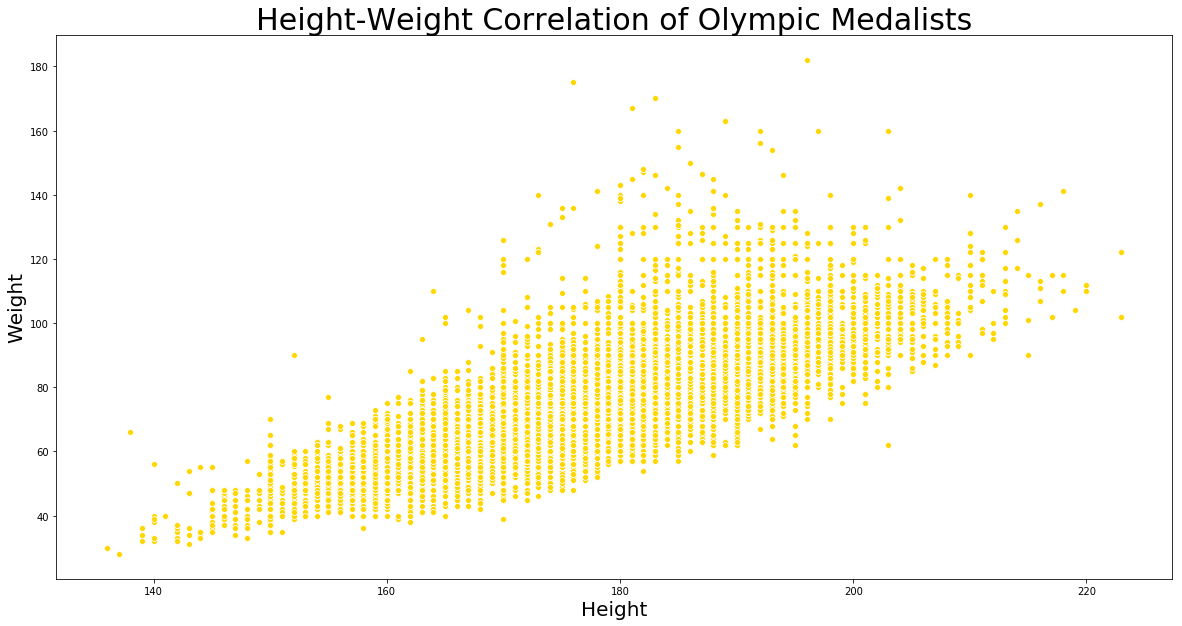

In [111]:
plt.figure(figsize=(20,10))
sns.scatterplot(nonnull_medalist_height['Height'],nonnull_medalist_weight['Weight'],color='gold')
plt.xlabel('Height',size=20)
plt.ylabel('Weight',size=20)
plt.title('Height-Weight Correlation of Olympic Medalists',size=30)

The scatterplot above displays the correlation between medalist heights and weights. The correlation follows a similar trend to the one observed earlier in section 3. Types of Athletes. Without further information, it is difficult to pull out any trends specific to athletes who medal in their events.

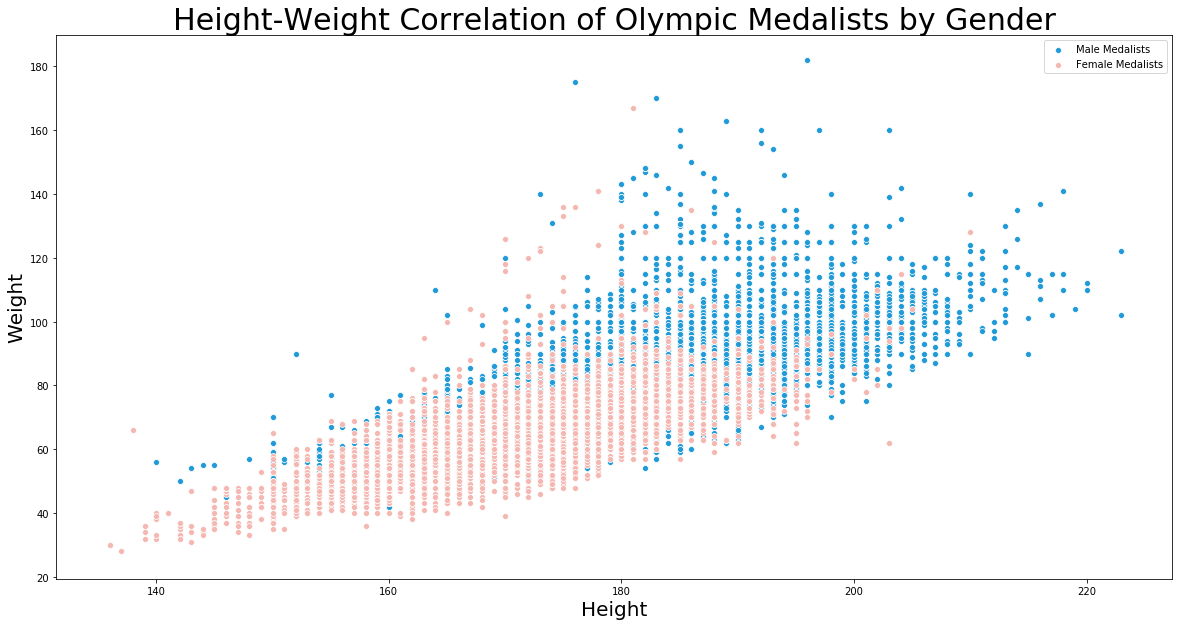

In [101]:
plt.figure(figsize=(20,10))
sns.scatterplot(nonnull_medalist_height[nonnull_medalist_height.Sex=='M']['Height'],
                nonnull_medalist_weight[nonnull_medalist_weight.Sex=='M']['Weight'],
                color='#219AD8',label='Male Medalists')
sns.scatterplot(nonnull_medalist_height[nonnull_medalist_height.Sex=='F']['Height'],
                nonnull_medalist_weight[nonnull_medalist_weight.Sex=='F']['Weight'],
                color='#F5B7B1',label='Female Medalists')
plt.xlabel('Height',size=20)
plt.ylabel('Weight',size=20)
plt.title('Height-Weight Correlation of Olympic Medalists by Gender',size=30)
plt.legend()

The scatterplot above differentiates between male and female medalists with regards to the height-weight correlation. Both genders follow similar patterns in the rate at which height increases with weight, although females at the lower end of the trendline, and most males falling slightly higher in both height and weight, as we have seen in many plots before. However, there do appear to be more male medalists with above average weights for their given heights that female medalists.

Ultimately, our plots of average Olympic medalist characteristics, while interesting, reveal little information of value without a comparison group of non-medalists. Thus, in the following cells, we will explore the difference in average characteristics for medalists versus non-medalists. Hopefully, we can discover some more interesting information!

## How have the average characteristics of Olympic medalists changed over time?

Below, we display pointplots and boxplots for age, height, and weight of Olympic Medalists over time, separated by year of the games. The pointplots most prominently illustrate the changing average for each of these characteristics, while the boxplots show the distributions for them each year. We will summarize findings at the bottom of this section.

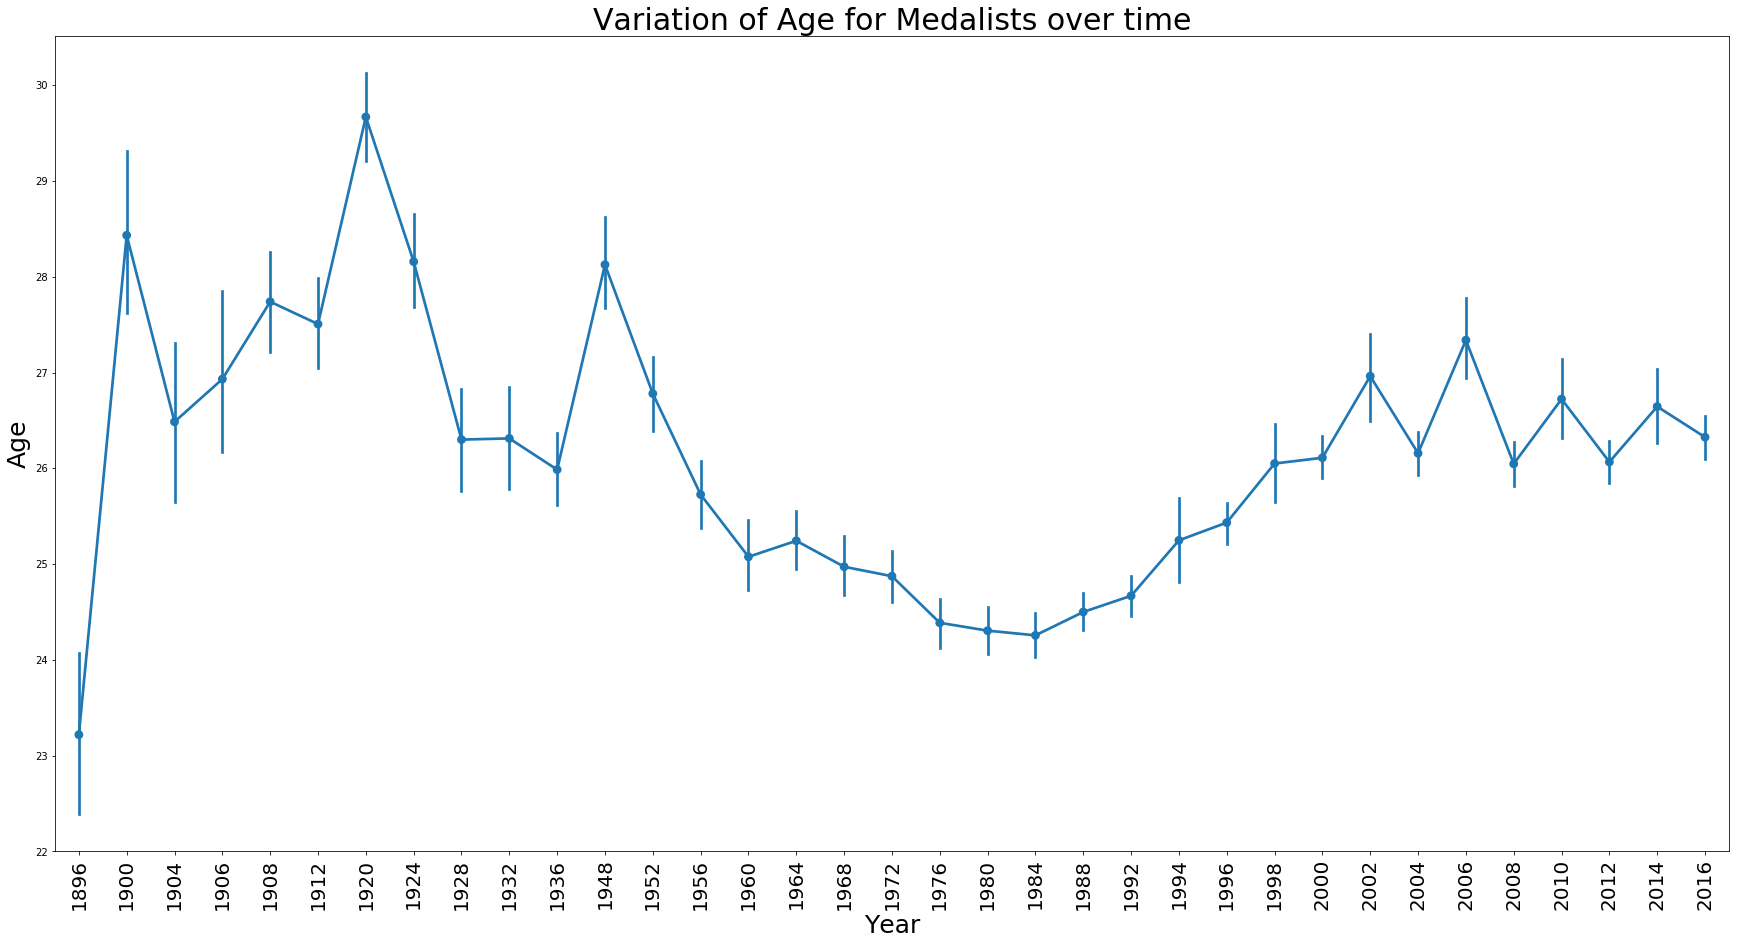

In [166]:
plt.figure(figsize=(30, 15))
sns.pointplot('Year', 'Age', data=nonnull_medalist_age)
plt.title('Variation of Age for Medalists over time',size=30)
plt.xlabel('Year',size=25)
plt.ylabel('Age',size=25)
plt.xticks(rotation=90,size=20)
plt.show()

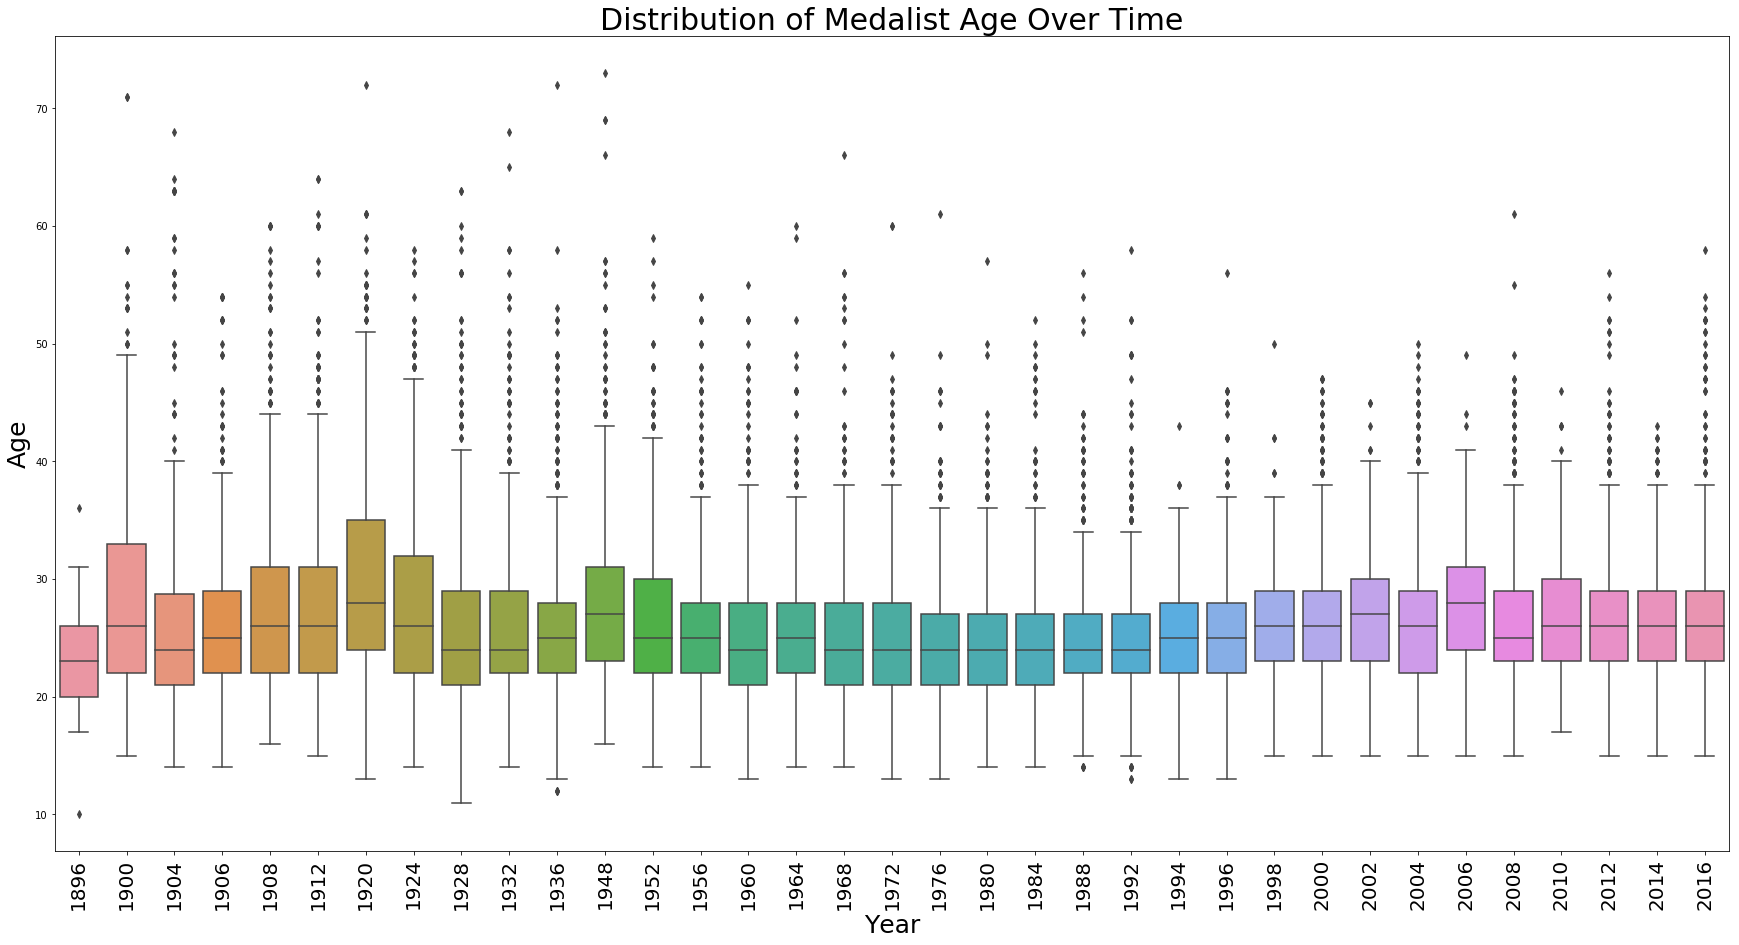

In [165]:
f, ax = plt.subplots(figsize = (30, 15))
sns.boxplot('Year','Age',data=nonnull_medalist_age)
plt.xticks(rotation = 90,size=20)
plt.xlabel('Year',size=25)
plt.ylabel('Age',size=25)
plt.title('Distribution of Medalist Age Over Time',fontsize=30)
plt.show()

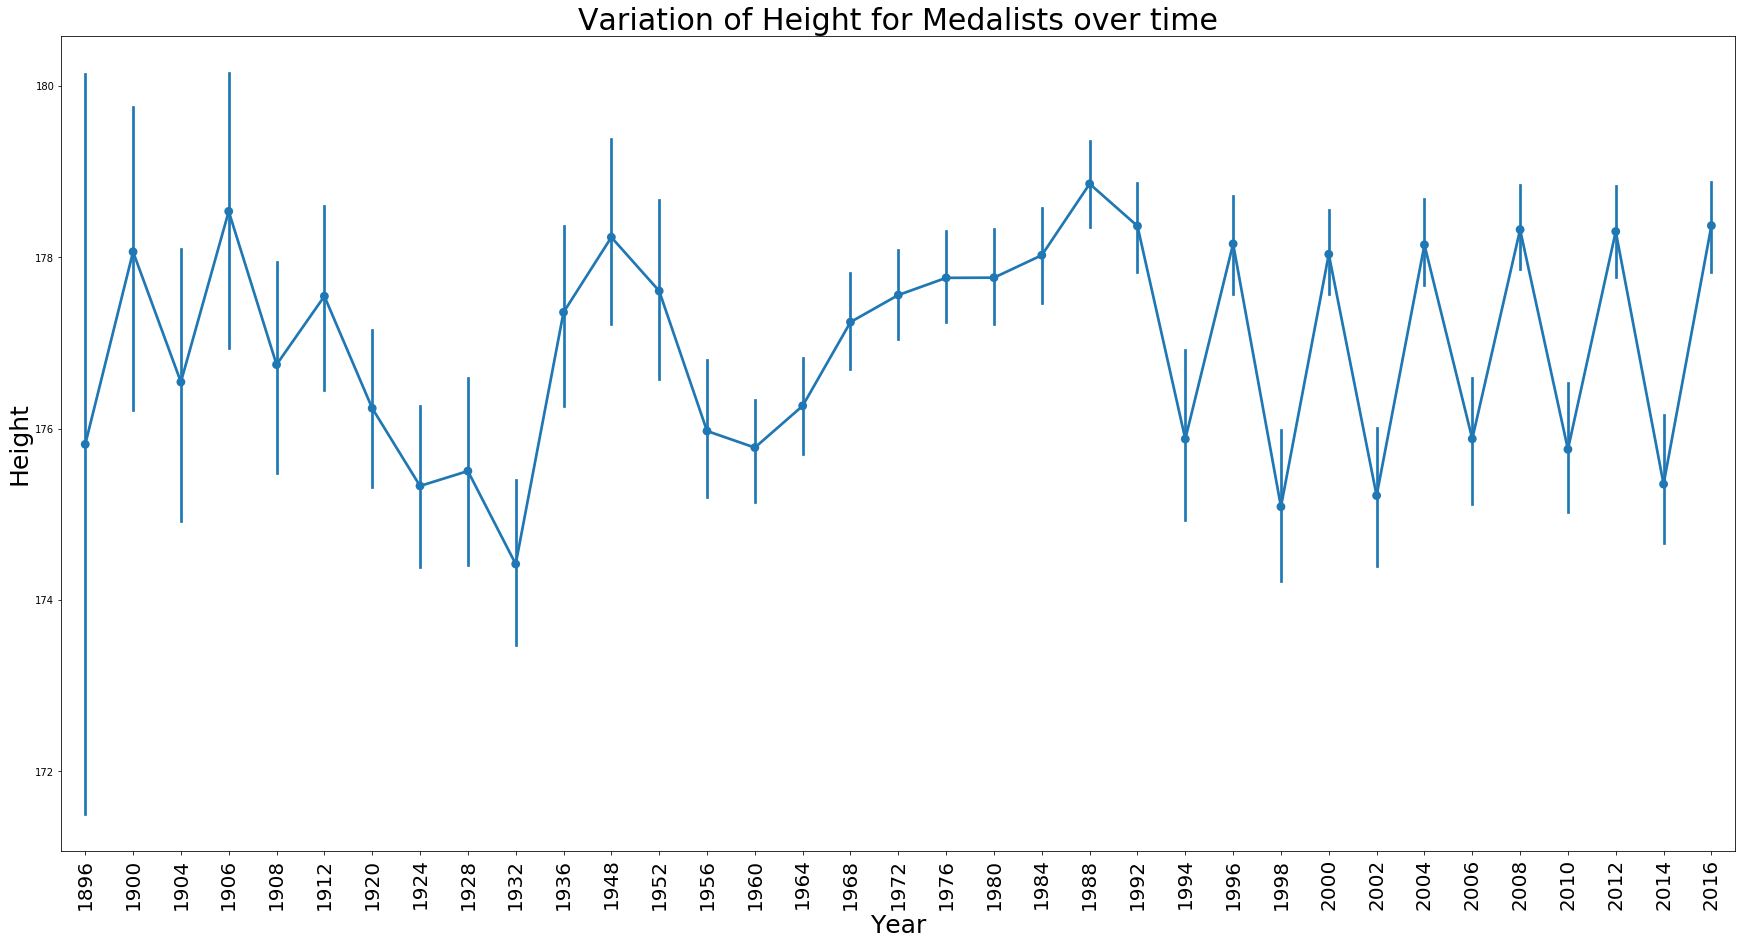

In [167]:
plt.figure(figsize=(30, 15))
sns.pointplot('Year', 'Height', data=nonnull_medalist_height)
plt.title('Variation of Height for Medalists over time',size=30)
plt.xlabel('Year',size=25)
plt.ylabel('Height',size=25)
plt.xticks(rotation=90,size=20)
plt.show()

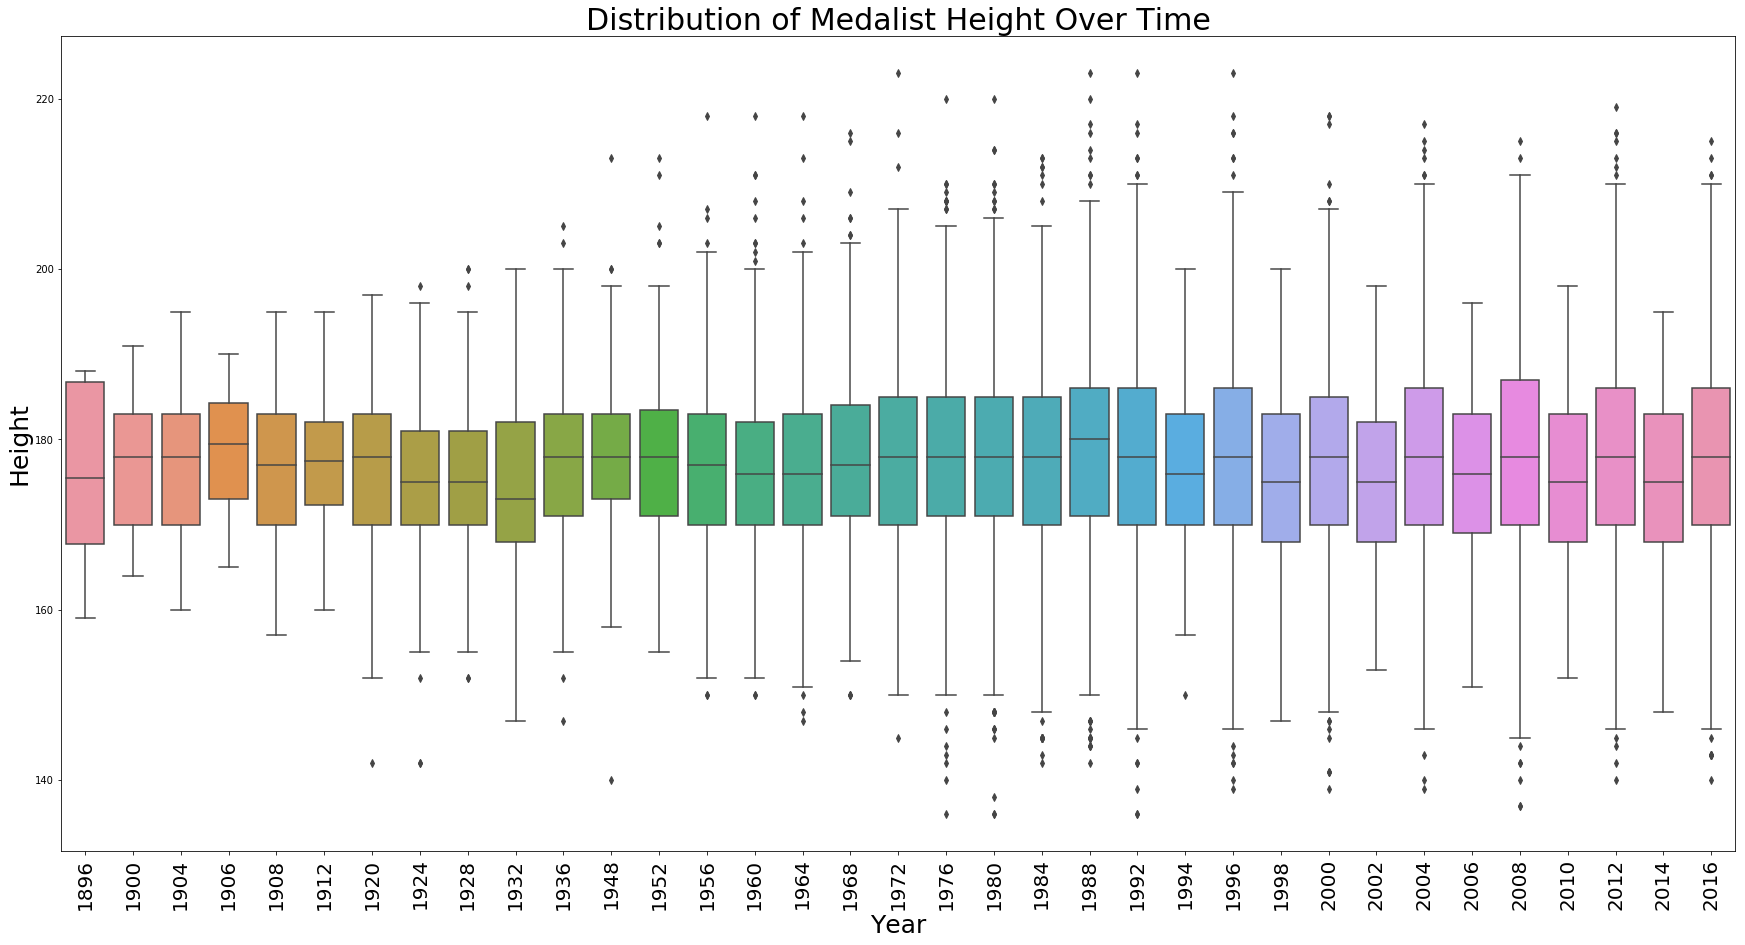

In [168]:
f, ax = plt.subplots(figsize = (30, 15))
sns.boxplot('Year','Height',data=nonnull_medalist_height)
plt.xticks(rotation = 90,size=20)
plt.xlabel('Year',size=25)
plt.ylabel('Height',size=25)
plt.title('Distribution of Medalist Height Over Time',fontsize=30)
plt.show()

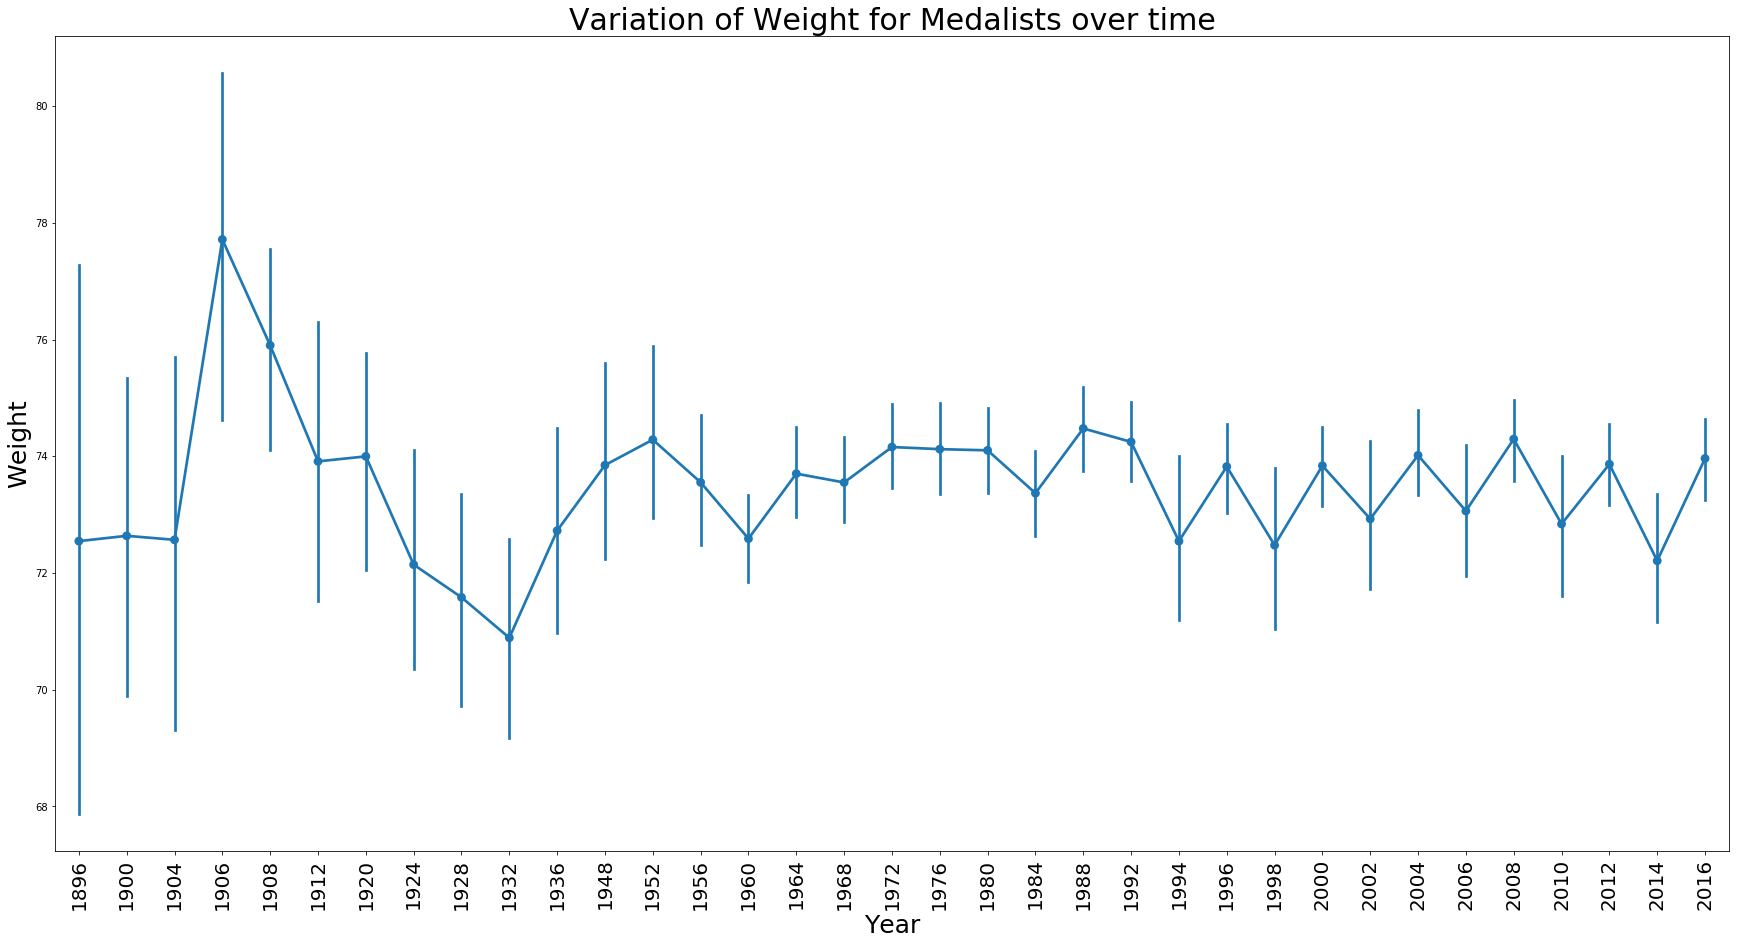

In [169]:
plt.figure(figsize=(30, 15))
sns.pointplot('Year', 'Weight', data=nonnull_medalist_weight)
plt.title('Variation of Weight for Medalists over time',size=30)
plt.xlabel('Year',size=25)
plt.ylabel('Weight',size=25)
plt.xticks(rotation=90,size=20)
plt.show()

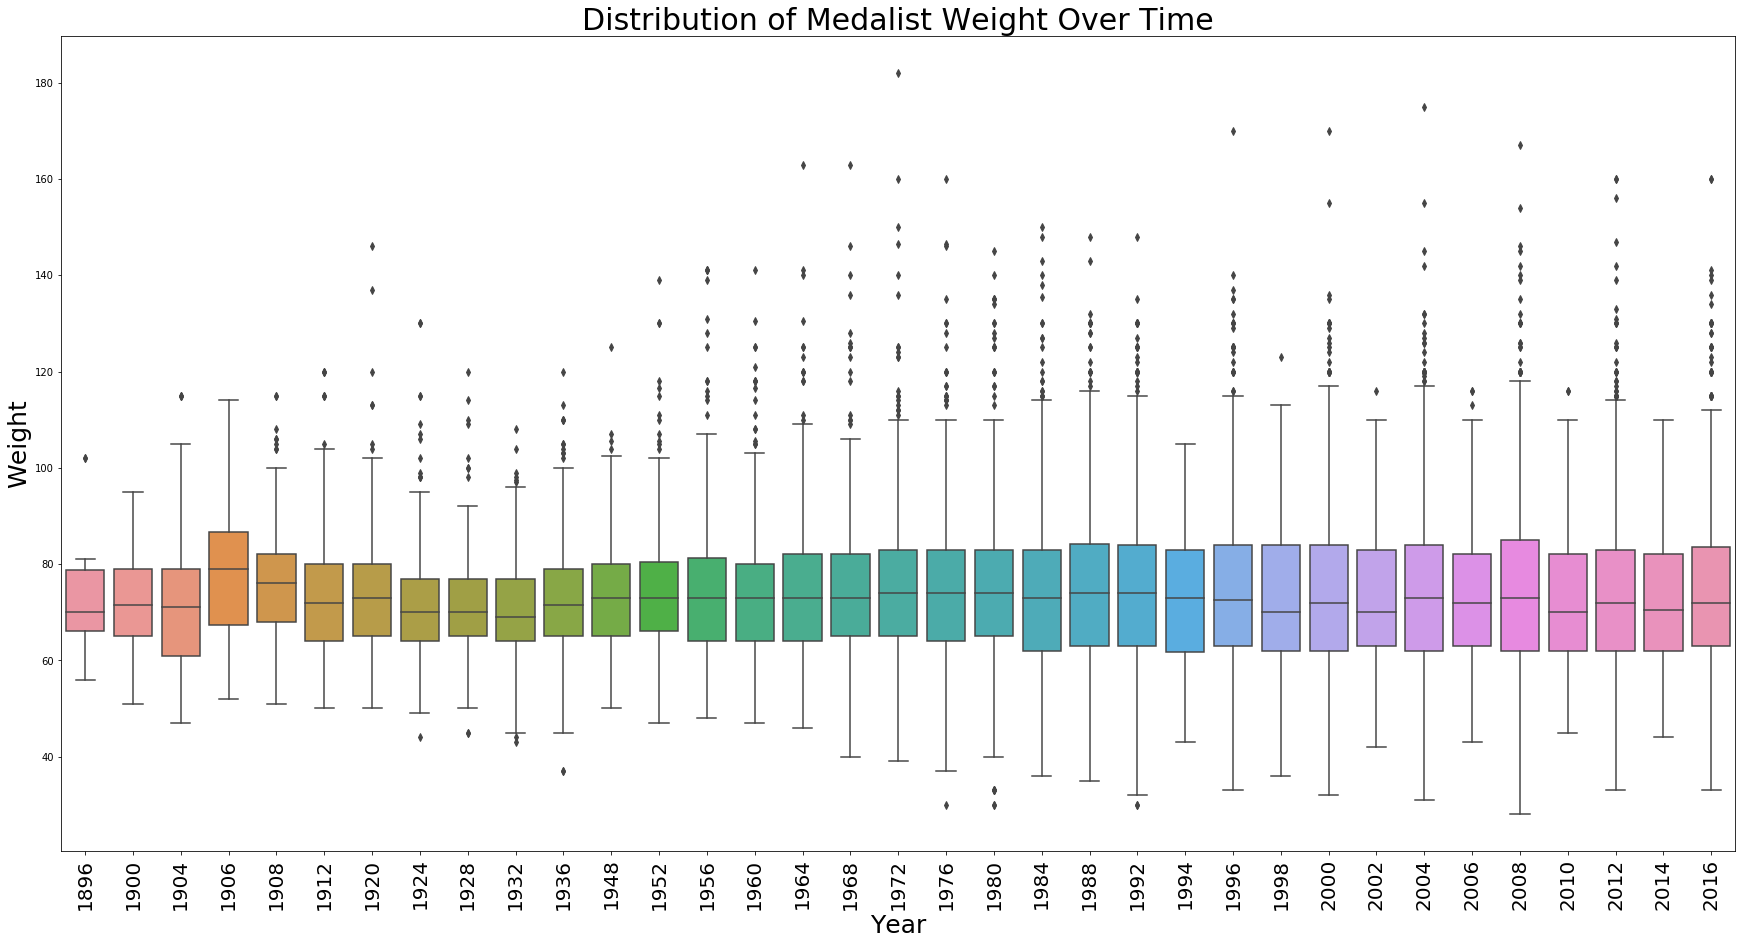

In [170]:
f, ax = plt.subplots(figsize = (30, 15))
sns.boxplot('Year','Weight',data=nonnull_medalist_weight)
plt.xticks(rotation = 90,size=20)
plt.xlabel('Year',size=25)
plt.ylabel('Weight',size=25)
plt.title('Distribution of Medalist Weight Over Time',fontsize=30)
plt.show()

Based on the plots above, it appears that all three characteristics - age, height, and weight - varied and shifted considerably throughout most of the 20th century, until stablizing around 1992, although age stabilized later in the year 2000, due to the increased age minimum for competition in the games. The instability experienced in the averages throughout these early years may be due to the high level of missing data for athletes in our dataset, leading to average values that are less representative of the actual heights, weights, and ages of medalists during these Olympic games. However, based on the boxplots for height and weight, we do see that greater variation in these characteristics exists today, most likely due to the differentiation in characteristics of medalists from different sports. Finally, given the separation of the summer and winter Olympic Games in 1992, we can clearly see the difference in average height, weight, and age of medalists from different seasons of games. Winter Olympics medalists appear to be on average lighter, shorter, and older than summer Olympics medalists. As our data collection processes begin more thorough and comprehensive in the coming years, it will be interesting to see how these trends shift and what this may reveal about the changing characteristics of our Olympic medalists.

## Do characteristics of Olympic medalists differ significantly from non-medalists?

Before beginning our t-test analysis, we test the normality of our distributions for medalist age, height, and weight.

In [102]:
from scipy import stats
print('Normality of medalist age distribution: ', stats.normaltest(nonnull_medalist_age.Age))
print('Normality of medalist height distribution: ', stats.normaltest(nonnull_medalist_height.Height))
print('Normality of medalist weight distribution: ', stats.normaltest(nonnull_medalist_weight.Weight))

Normality of medalist age distribution:  NormaltestResult(statistic=12130.970441726393, pvalue=0.0)
Normality of medalist height distribution:  NormaltestResult(statistic=41.70882149251725, pvalue=8.770906665764696e-10)
Normality of medalist weight distribution:  NormaltestResult(statistic=3057.9049021504397, pvalue=0.0)


In [103]:
print(len(nonnull_medalist_age),len(nonnull_medalist_height),len(nonnull_medalist_weight))

39051 31072 30456


Based on the cells above, we conclude that the distributions are not normal, with p-values for the normal test well below the confidence threshold of 0.05. However, our samples are large enough, with over 30,000 values each, to proceed with the t-tests without normalizing our distributions.

### Age

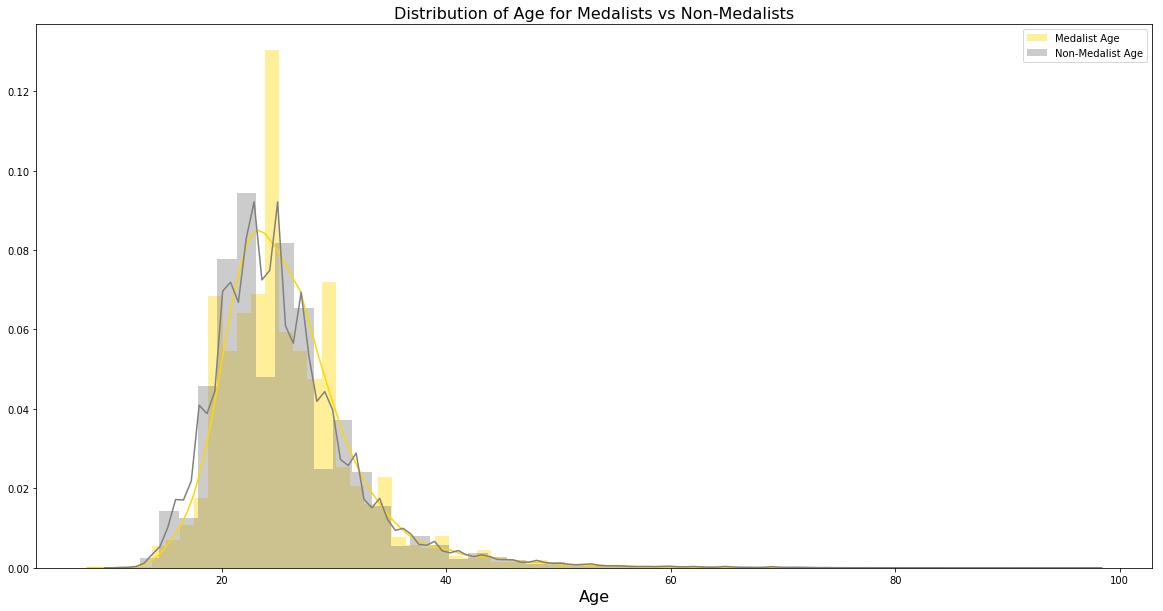

In [112]:
plt.figure(figsize=(20, 10))
sns.distplot(nonnull_medalist_age.Age, label='Medalist Age', color='gold')
sns.distplot(nonnull_nonmedalist_age.Age, label='Non-Medalist Age', color='gray')
plt.title('Distribution of Age for Medalists vs Non-Medalists', fontsize=16)
plt.xlabel('Age', fontsize=16)
plt.legend()
plt.show()

Based on the distributions above, it appears that age for medalists and non-medalists nearly mirror one another, without much significant variation. The average medalist age does appear to be more concentrated around the average of 26 years, with a much higher proportion of medalists at this age than the proportion for any other age in either distribution. Below, we plot and print the specific averages and difference of averages of medalists and nonmedalists.

Text(0.5, 1.0, 'Average Age by Medal Status')

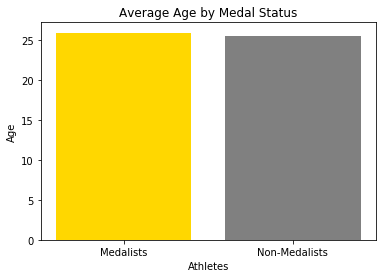

In [105]:
x = ['Medalists', 'Non-Medalists']
y = [np.array(nonnull_medalist_age.Age).mean(),np.array(nonnull_nonmedalist_age.Age).mean()]
plt.bar(x,y,color=('gold','gray'))
plt.ylabel('Age')
plt.xlabel('Athletes')
plt.title('Average Age by Medal Status')

In [106]:
print('Average Medalist Age',np.array(nonnull_medalist_age.Age).mean())
print('Average Non-Medalist Age',np.array(nonnull_nonmedalist_age.Age).mean())
print('Difference in Means',np.array(nonnull_medalist_age.Age).mean()-np.array(nonnull_nonmedalist_age.Age).mean())

Average Medalist Age 25.925174771452717
Average Non-Medalist Age 25.492288547155994
Difference in Means 0.4328862242967233


In [107]:
def Cohen_d(group1, group2):
    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    d = diff / np.sqrt(pooled_var)
    
    return d

In [108]:
Cohen_d(np.array(nonnull_medalist_age.Age),np.array(nonnull_nonmedalist_age.Age))

0.06772643696557817

In [121]:
np.var(nonnull_medalist_age.Age) == np.var(nonnull_nonmedalist_age.Age)

False

In [110]:
stats.ttest_ind(nonnull_medalist_age.Age, nonnull_nonmedalist_age.Age, equal_var=False)

Ttest_indResult(statistic=13.149116533879521, pvalue=1.966581069958628e-39)

The results for the t-test are displayed above, accounting for the unequal variance of the distibutions. With a p-value under 0.05, we can reject the null hypothesis and accept the alternate hypothesis that a signficant difference exists between medalist and nonmedalist age. With a difference in mean age of 0.43 years, the distributions for medalist and nonmedalist age lie 0.0677 standard deviations apart, allowing us to claim little to no effect size in the age difference. Medalist and nonmedalist age are not significantly different.

### Height

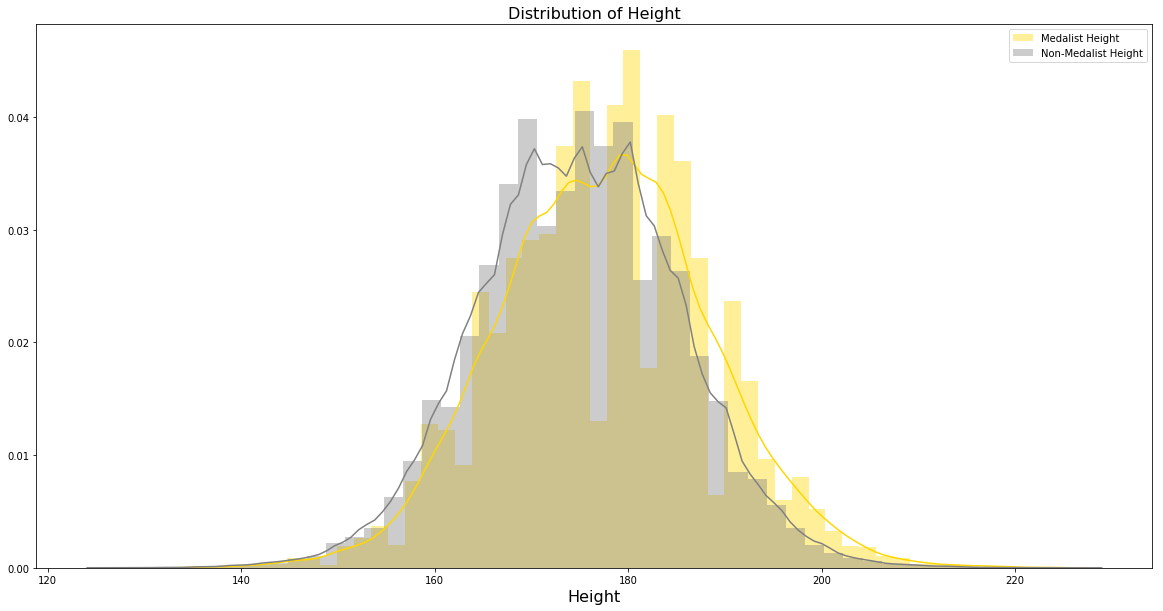

In [111]:
plt.figure(figsize=(20, 10))
sns.distplot(nonnull_medalist_height.Height, label='Medalist Height', color='gold')
sns.distplot(nonnull_nonmedalist_height.Height, label='Non-Medalist Height', color='gray')
plt.title('Distribution of Height', fontsize=16)
plt.xlabel('Height', fontsize=16)
plt.legend()
plt.show()

Based on the distributions above, it appears that height for medalists and non-medalists also nearly mirror one another, without much significant variation. Below, we plot and print the specific averages and difference of averages of medalists and nonmedalists.

Text(0.5, 1.0, 'Average Height by Medal Status')

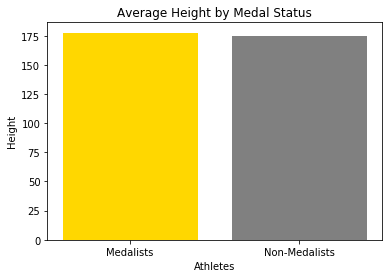

In [113]:
x = ['Medalists', 'Non-Medalists']
y = [np.array(nonnull_medalist_height.Height).mean(),np.array(nonnull_nonmedalist_height.Height).mean()]
plt.bar(x,y,color=('gold','gray'))
plt.ylabel('Height')
plt.xlabel('Athletes')
plt.title('Average Height by Medal Status')

In [114]:
print('Average Medalist Height',np.array(nonnull_medalist_height.Height).mean())
print('Average Non-Medalist Height',np.array(nonnull_nonmedalist_height.Height).mean())
print('Difference in Means',np.array(nonnull_medalist_height.Height).mean()-np.array(nonnull_nonmedalist_height.Height).mean())

Average Medalist Height 177.55419670442842
Average Non-Medalist Height 174.95630250232108
Difference in Means 2.597894202107341


In [115]:
Cohen_d(np.array(nonnull_medalist_height.Height),np.array(nonnull_nonmedalist_height.Height))

0.24793646695355126

In [116]:
np.var(nonnull_medalist_height.Height) == np.var(nonnull_nonmedalist_height.Height)

False

In [117]:
stats.ttest_ind(nonnull_medalist_height.Height, nonnull_nonmedalist_height.Height, equal_var=False)

Ttest_indResult(statistic=39.07095236759314, pvalue=0.0)

The results for the t-test are displayed above, accounting for the unequal variance of the distibutions. With a p-value under 0.05, we can reject the null hypothesis and accept the alternate hypothesis that a signficant difference exists between medalist and nonmedalist height. With a difference in mean height of 2.598 cm, the distributions for medalist and nonmedalist height lie 0.248 standard deviations apart, allowing us to claim a **small** effect size in the height difference. Medalist and nonmedalist height are indeed significantly different, but only to a small extent!

### Weight

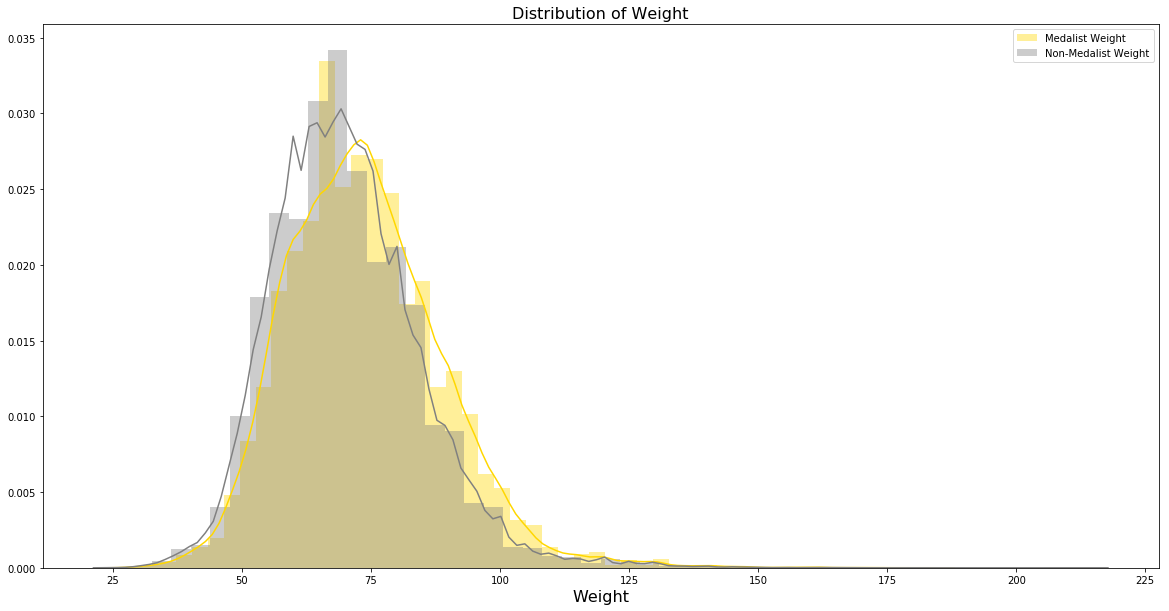

In [118]:
plt.figure(figsize=(20, 10))
sns.distplot(nonnull_medalist_weight.Weight, label='Medalist Weight', color='gold')
sns.distplot(nonnull_nonmedalist_weight.Weight, label='Non-Medalist Weight', color='gray')
plt.title('Distribution of Weight', fontsize=16)
plt.xlabel('Weight', fontsize=16)
plt.legend()
plt.show()

Based on the distributions above, it appears that weight for medalists and non-medalists also nearly mirror one another, without much significant variation. Below, we plot and print the specific averages and difference of averages of medalists and nonmedalists.

Text(0.5, 1.0, 'Average Weight by Medal Status')

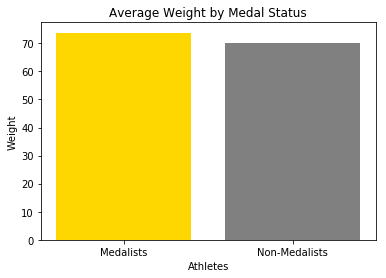

In [119]:
x = ['Medalists', 'Non-Medalists']
y = [np.array(nonnull_medalist_weight.Weight).mean(),np.array(nonnull_nonmedalist_weight.Weight).mean()]
plt.bar(x,y,color=('gold','gray'))
plt.ylabel('Weight')
plt.xlabel('Athletes')
plt.title('Average Weight by Medal Status')

In [120]:
print('Average Medalist Weight',np.array(nonnull_medalist_weight.Weight).mean())
print('Average Non-Medalist Weight',np.array(nonnull_nonmedalist_weight.Weight).mean())
print('Difference in Means',np.array(nonnull_medalist_weight.Weight).mean()-np.array(nonnull_nonmedalist_weight.Weight).mean())

Average Medalist Weight 73.77068010682076
Average Non-Medalist Weight 70.17677063119311
Difference in Means 3.5939094756276546


In [121]:
Cohen_d(np.array(nonnull_medalist_weight.Weight),np.array(nonnull_nonmedalist_weight.Weight))

0.2514687657204241

In [122]:
np.var(nonnull_medalist_weight.Weight) == np.var(nonnull_nonmedalist_weight.Weight)

False

In [123]:
stats.ttest_ind(nonnull_medalist_weight.Weight, nonnull_nonmedalist_weight.Weight, equal_var=False)

Ttest_indResult(statistic=38.908414694280225, pvalue=0.0)

The results for the t-test are displayed above, accounting for the unequal variance of the distibutions. With a p-value under 0.05, we can reject the null hypothesis and accept the alternate hypothesis that a signficant difference exists between medalist and nonmedalist weight. With a difference in mean weight of 3.59 kg, the distributions for medalist and nonmedalist weight lie 0.25 standard deviations apart, allowing us to claim a **small** effect size in the weight difference. Medalist and nonmedalist weight are indeed significantly different, but only to a small extent!

Based on all our findings above, it appears that little difference exists between the characteristics for Olympic medalists and those who do not medal in their events. Many other factors affect the specific characteristics that influence whether or not an athlete will medal, including their gender, specific sport, and more. In the future, I hope to explore many of these additional factors as well!

## Which individuals have received the most medals?

Receiving an Olympic medal is an honor above almost any other honor in the athletic world, and those who talented enough to earn one have so much to be proud of. However, even some athletes rise above all the rest in terms of their accolades and accomplishments in the Olympic games. Below, we will explore which athletes have achieved the most medals throughout the Olympic careers and analyze which sports and countries they primarily come from.

Below, we create a list of the top 50 Olympic athletes of all time, based upon number of medals achieved. The remarkability of the table truly speaks for itself.

In [38]:
top_medalists = medalist_data[['Name','NOC','Sport','Medal']].groupby(['Name','NOC','Sport']).count()
top_medalists = top_medalists.sort_values('Medal',ascending=False)

In [156]:
top_medalists.head(50)

,Name,NOC,Sport,Medal
0,"Michael Fred Phelps, II",USA,Swimming,28
1,Larysa Semenivna Latynina (Diriy-),URS,Gymnastics,18
2,Nikolay Yefimovich Andrianov,URS,Gymnastics,15
3,Ole Einar Bjrndalen,NOR,Biathlon,13
4,Edoardo Mangiarotti,ITA,Fencing,13
5,Takashi Ono,JPN,Gymnastics,13
6,Borys Anfiyanovych Shakhlin,URS,Gymnastics,13
7,Paavo Johannes Nurmi,FIN,Athletics,12
8,Ryan Steven Lochte,USA,Swimming,12
9,"Dara Grace Torres (-Hoffman, -Minas)",USA,Swimming,12


In [126]:
top_medalists.reset_index(inplace=True)

In [127]:
top_medalists.head()

,Name,NOC,Sport,Medal
0,"Michael Fred Phelps, II",USA,Swimming,28
1,Larysa Semenivna Latynina (Diriy-),URS,Gymnastics,18
2,Nikolay Yefimovich Andrianov,URS,Gymnastics,15
3,Ole Einar Bjrndalen,NOR,Biathlon,13
4,Edoardo Mangiarotti,ITA,Fencing,13


In [150]:
top_medalists_sports = top_medalists.head(50).Sport.value_counts()
to_graph = pd.DataFrame(top_medalists_sports.head(50))
to_graph.reset_index(inplace=True)

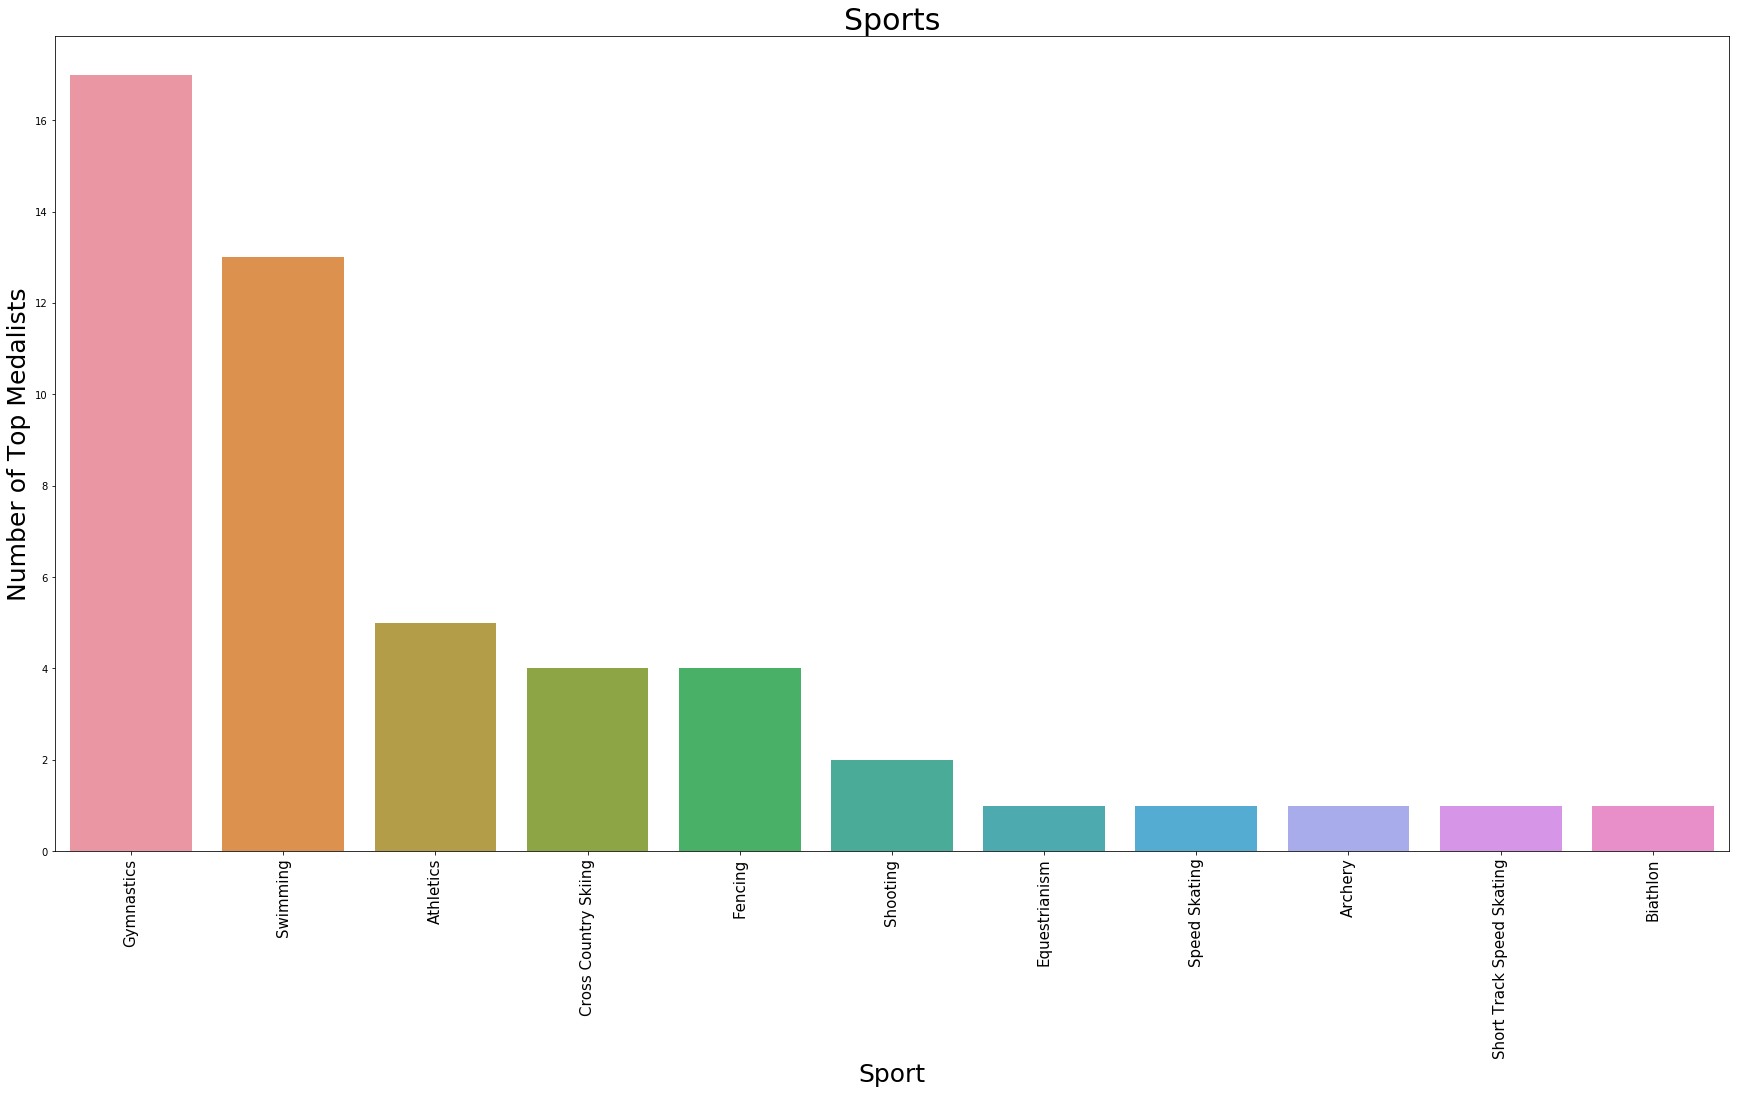

In [153]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(to_graph['index'],to_graph.Sport)
plt.xticks(rotation = 90,size=15)
plt.xlabel('Sport',size=25)
plt.ylabel('Number of Top Medalists',size=25)
plt.title('Sports',fontsize=30)
plt.show()

From our list of top 50 medalists, gymnastics and swimming produce the most high-achieving athletes, together with 30 out of 50 of these athletes. Olympic gymnasts and swimmers are truly astonishing in their athletic abilities, but even more impressive is the number of these particular athletes who are able to win upwards of nine medals each throughout their Olympic careers. Other notable sports with many high-achieving athletes are athletics (track & field), cross country skiing, and fencing.

In [154]:
top_medalists_noc = top_medalists.head(50).NOC.value_counts()
to_graph = pd.DataFrame(top_medalists_noc.head(50))
to_graph.reset_index(inplace=True)

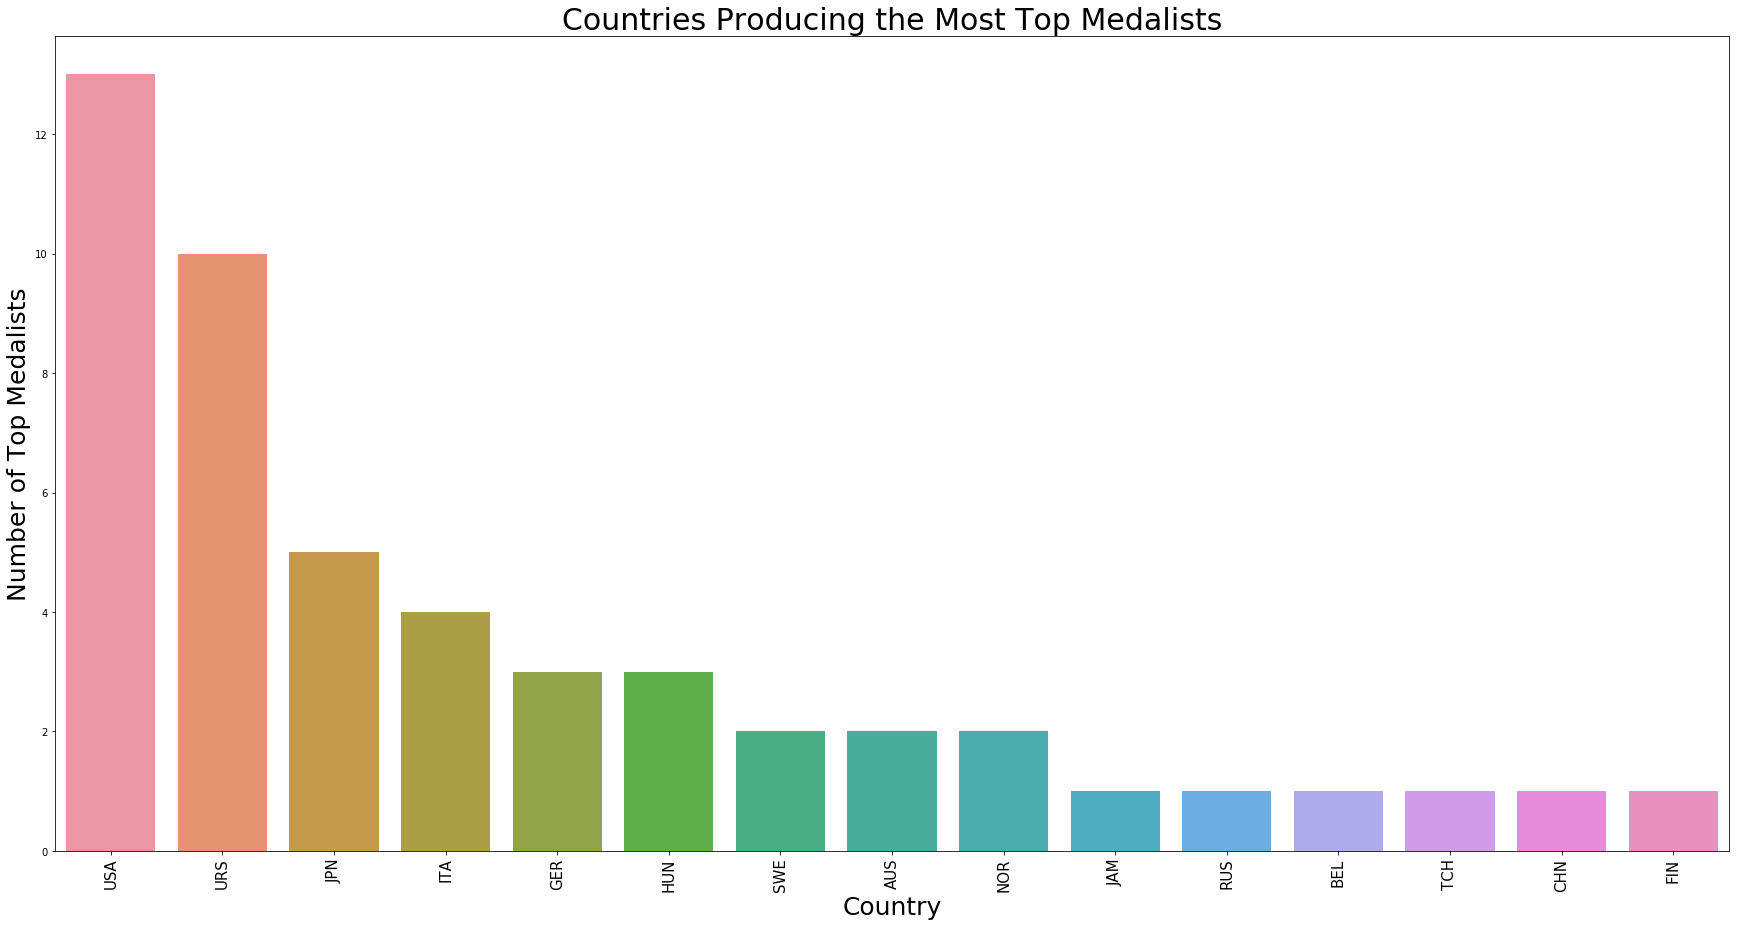

In [155]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(to_graph['index'],to_graph.NOC)
plt.xticks(rotation = 90,size=15)
plt.xlabel('Country',size=25)
plt.ylabel('Number of Top Medalists',size=25)
plt.title('Countries Producing the Most Top Medalists',fontsize=30)
plt.show()

The countries with the highest number of high-achieving athletes are the USA, Russia, Japan, Italy, Germany, and Hungary. The US and Russia top this list with at least ten high-medaling athletes each. As world superpowers that often flex their international power and rank through shows of ability such as the Olympic Games, it makes sense that the first five countries on our list, all of whom have been key players in our World Wars and the Cold War, would have such a high number of superb athletes.

## Who are our youngest and oldest medalists?

As we noticed above in our age distribution for Olympic medalists, there are some exceptionally young and old athletes at the Olympics who have achieved medals! Let's explore which sports they competed in.

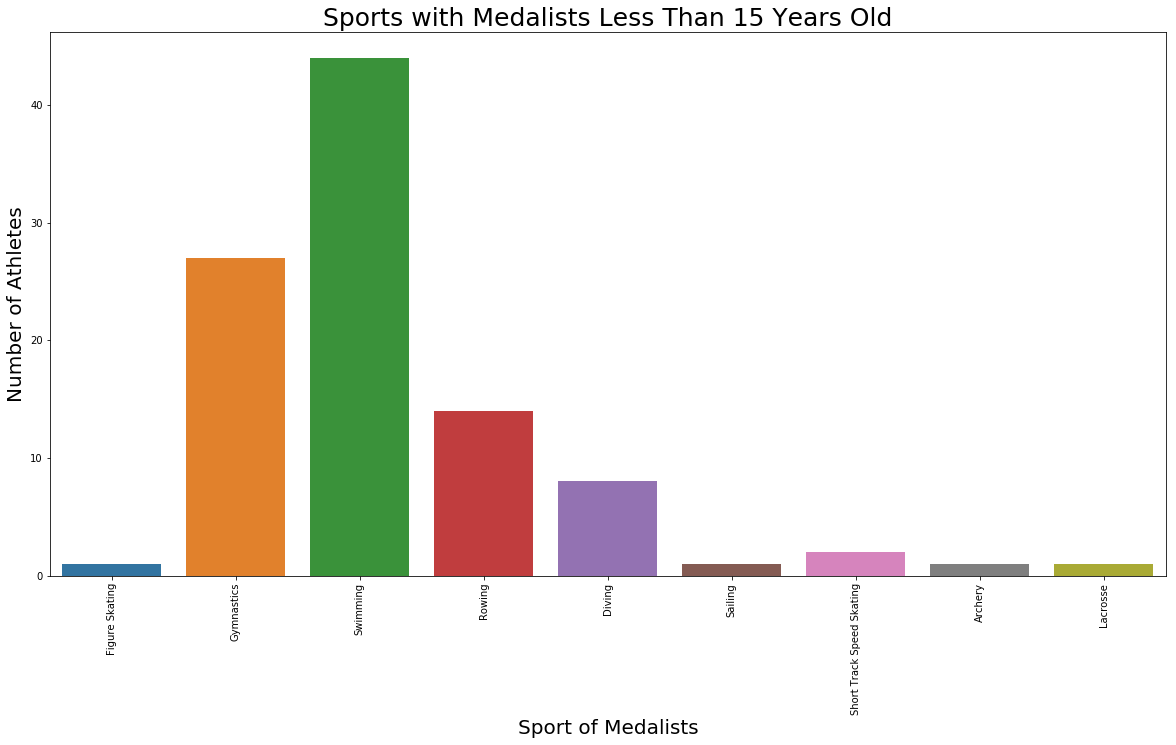

In [157]:
plt.figure(figsize=(20, 10))
sns.countplot(nonnull_medalist_age[nonnull_medalist_age['Age']<15].Sport)
plt.title('Sports with Medalists Less Than 15 Years Old',size=25)
plt.xlabel('Sport of Medalists',size=20)
plt.ylabel('Number of Athletes',size=20)
plt.xticks(rotation=90)
plt.show()

Just like our high-achieving medalists in the prior section, gymnastics and swimming produce the most young medalists, both with over 25 medalists under the age of 15. Rowing and diving also produce many young medalists as well!

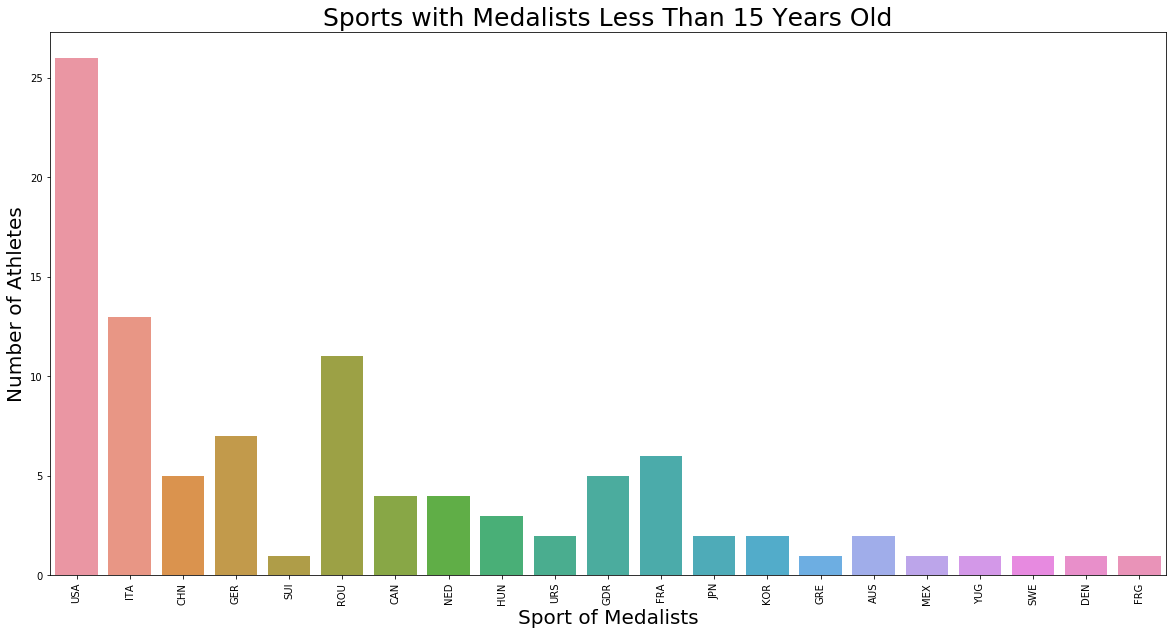

In [159]:
plt.figure(figsize=(20, 10))
sns.countplot(nonnull_medalist_age[nonnull_medalist_age['Age']<15].NOC)
plt.title('Sports with Medalists Less Than 15 Years Old',size=25)
plt.xlabel('Sport of Medalists',size=20)
plt.ylabel('Number of Athletes',size=20)
plt.xticks(rotation=90)
plt.show()

The USA, Italy, and Germany are once again high on the list, this time for the number of athletes medaling under the age of 15. However, Romania makes a top appearance, with over 10 young medalists! Russia is lower on this list than typical for a county of its size and standing, but still with a few from during their time as the Soviet Union.

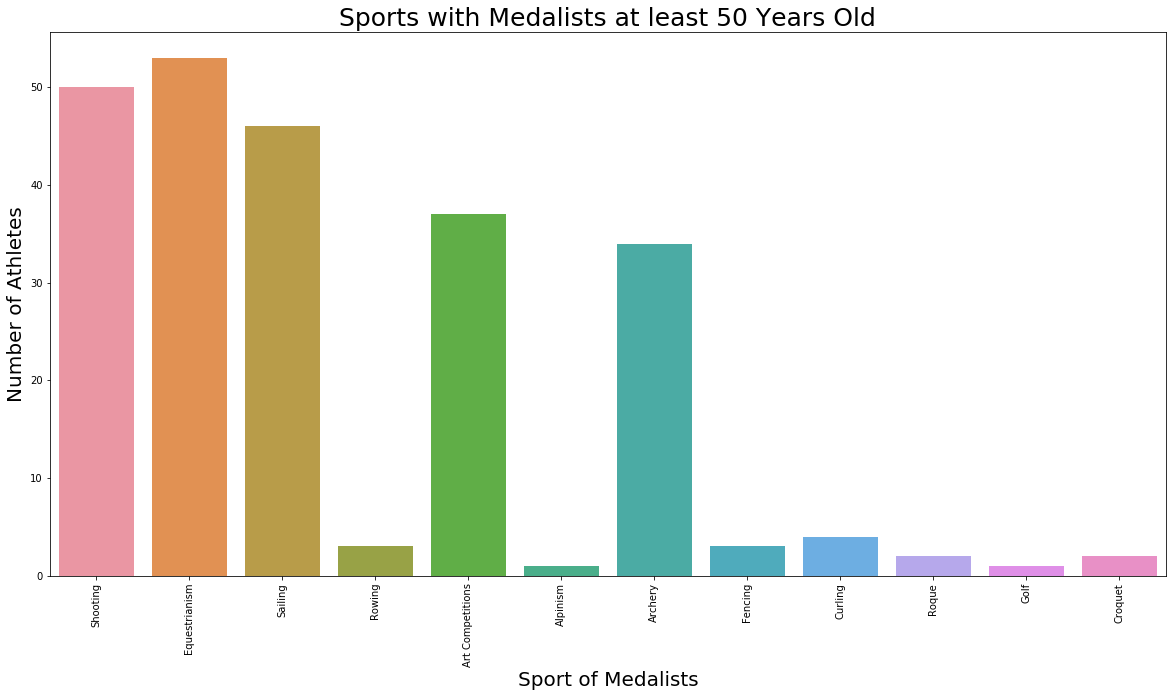

In [155]:
plt.figure(figsize=(20, 10))
sns.countplot(nonnull_medalist_age[nonnull_medalist_age['Age']>49].Sport)
plt.title('Sports with Medalists at least 50 Years Old',size=25)
plt.xlabel('Sport of Medalists',size=20)
plt.ylabel('Number of Athletes',size=20)
plt.xticks(rotation=90)
plt.show()

Some of our less-frequently mentioned sports thus far make an appearance in the plot above, which shows sports for medalists at least 50 years of age. Equestrianism, shooting, and sailing top this list, with art competitions and archery also producing many older medalists. These sports are often less physically demanding than sports such as gymnastics and swimming, in which our younger athletes often prevail. However, these athletes show that age is not necessarily a limiting factor in the athletic world - medalists come from ages of all kinds! 

## Which sports have produced the most medalists over time?

In [160]:
top_sports = medalist_data.Sport.value_counts()
to_graph = pd.DataFrame(top_sports)
to_graph.reset_index(inplace=True)

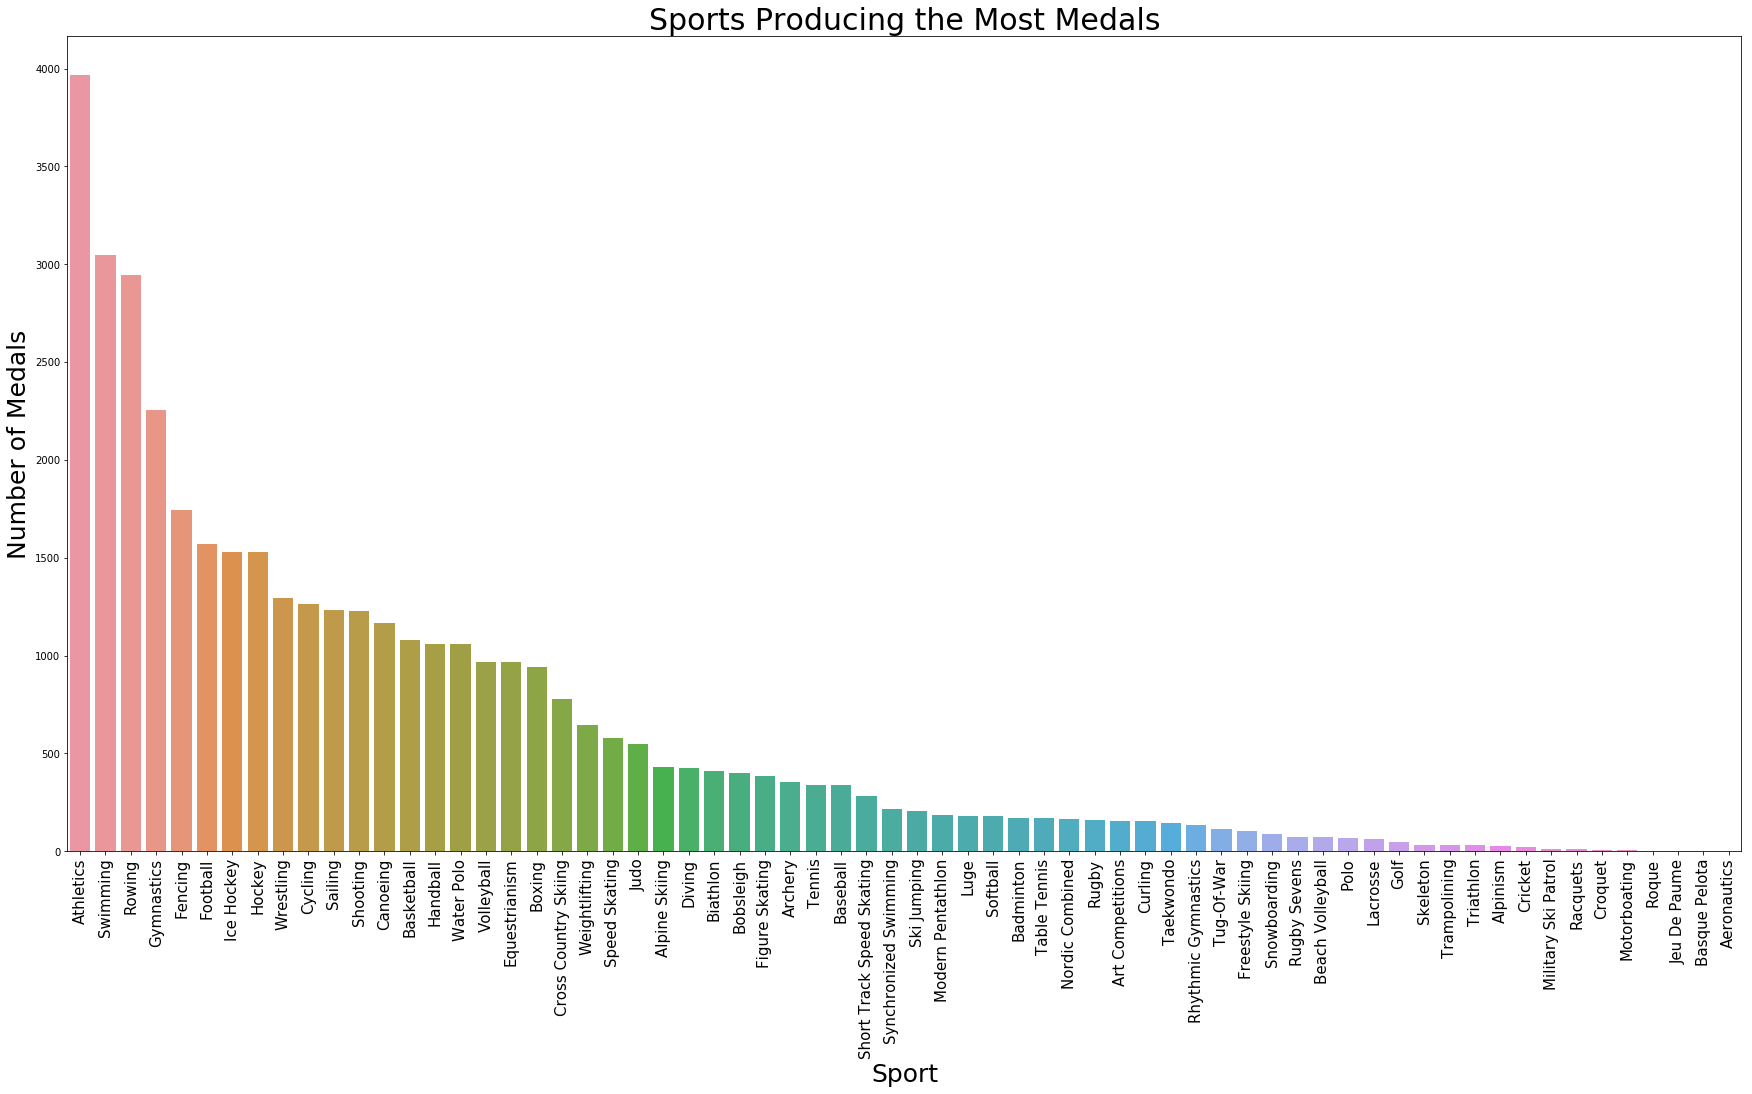

In [163]:
f, ax = plt.subplots(figsize = (30, 15))
sns.barplot(to_graph['index'],to_graph.Sport)
plt.xticks(rotation = 90,size=15)
plt.xlabel('Sport',size=25)
plt.ylabel('Number of Medals',size=25)
plt.title('Sports Producing the Most Medals',fontsize=30)
plt.show()

Athletics, swimming, rowing, and gymnastics top the list of sports with regards to the number of medals distributed since 1896. Many factors affect their prominence in the games, from the number of Olympic programs that have featured these sports (nearly all of them!) to the number of events in each of these sports. For all four of these, many events occur throughout each games, and for rowing, many people comprise each team in the events, allowing for a higher number of medals from these sports compared to other, smaller sports within the games. At the bottom of the list, we see sports such as aeronautics, basque pelota, jeu de paume, and roque, events which did not last long on the Olympic Games' program.

## Can we predict whether an athlete will medal based on their characteristics?

In [72]:
X = data[['Sex','Age','Height','Weight']].copy()

In [73]:
Y = data['Medal'].copy()

In [85]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [75]:
X = pd.get_dummies(X)

In [76]:
X.head()

,Age,Height,Weight,Sex_F,Sex_M
0,24.0,180.0,80.0,0,1
1,23.0,170.0,60.0,0,1
2,24.0,179.0,74.0,0,1
3,34.0,179.0,74.0,0,1
4,21.0,185.0,82.0,1,0


In [77]:
Y = pd.get_dummies(Y)

In [78]:
Y.head()

,Bronze,Gold,None,Silver
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


In [96]:
Y.sum()

Bronze     13295
Gold       13372
None      231333
Silver     13116
dtype: int64

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.4)

In [92]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
Yhat_train = model.predict(X_train)
acc_train = metrics.accuracy_score(Yhat_train, y_train)
Yhat_test = model.predict(X_test)
acc_test = metrics.accuracy_score(Yhat_test, y_test)
print("Training Accuracy:",acc_train)
print("Testing Accuracy:",acc_test)

Training Accuracy: 0.8400371306149297
Testing Accuracy: 0.8294189788560311


In [93]:
cm_knn = confusion_matrix(y_test.values.argmax(axis=1), Yhat_test.argmax(axis=1))
print(cm_knn)

[[  212    25  5009    12]
 [  272    39  4993     6]
 [ 2372   201 89892    95]
 [  212    28  5068    11]]


In [97]:
import itertools
def final_confusion_matrix(cnf_matrix, y, title):
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

    #Add title and Axis Labels
    plt.title('Confusion Matrix for {}'.format(title))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Add appropriate Axis Scales
    class_names = ['Bronze','Gold','None','Silver'] #Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    #Add Labels to Each Cell
    thresh = cnf_matrix.max() / 2. #Used for text coloring below
    #Here we iterate through the confusion matrix and append labels to our visualization.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    #Add a Side Bar Legend Showing Colors
    plt.colorbar()

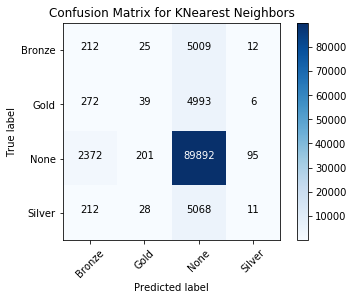

In [98]:
final_confusion_matrix(cm_knn,Y,'KNearest Neighbors')

Based on this preliminary k-nearest neighbors classification model, we achieve a 82.94% testing accuracy, following our 84% training accuracy, which is much higher than the theorectical 25% accuracy that we could achieve based on random chance with four target classifications. However, based on our observations of the confusion matrix above, we see that the high number of non-medalists heavily skew our results. Even if our model predicted that every athlete was in the "None" category, it could achieve a fairly high accuracy score. We see this above, as our model only correctly classifies 262 medalists, while misclassifying a much higher number of the other medalists. However, by correctly classifying nearly 90,000 non-medalists, the model's accuracy score is still over 80%. Let's see if simply separating our classes into medalists and non-medalists improves our model's results below.

In [171]:
Y2 = Y.copy()

In [172]:
Y2['Medal']=Y2['Bronze']+Y2['Silver']+Y2['Gold']

In [174]:
Y2.drop(['Bronze','Silver','Gold'],axis=1,inplace=True)

In [176]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y2,test_size=0.4)

In [177]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
Yhat_train = model.predict(X_train)
acc_train = metrics.accuracy_score(Yhat_train, y_train)
Yhat_test = model.predict(X_test)
acc_test = metrics.accuracy_score(Yhat_test, y_test)
print("Training Accuracy:",acc_train)
print("Testing Accuracy:",acc_test)

Training Accuracy: 0.8560389502609593
Testing Accuracy: 0.8387138417844662


In [179]:
cm_knn = confusion_matrix(y_test.values.argmax(axis=1), Yhat_test.argmax(axis=1))
print(cm_knn)

[[90238  2424]
 [15067   718]]


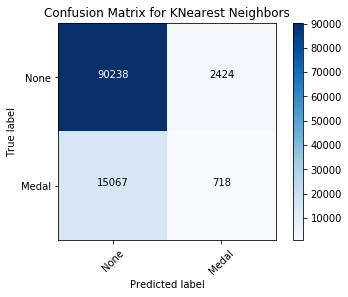

In [182]:
def fin_confusion_matrix(cnf_matrix, y, title):
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

    #Add title and Axis Labels
    plt.title('Confusion Matrix for {}'.format(title))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Add appropriate Axis Scales
    class_names = ['None','Medal'] #Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)

    #Add Labels to Each Cell
    thresh = cnf_matrix.max() / 2. #Used for text coloring below
    #Here we iterate through the confusion matrix and append labels to our visualization.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

    #Add a Side Bar Legend Showing Colors
    plt.colorbar()
fin_confusion_matrix(cm_knn,Y2,'KNearest Neighbors')

This binary classification model performs slightly better than our model from before, with 83.87% testing accuracy. Unfortunately, we see a very similar problem here, with only 718 medalists correctly classified and over 15,000 others mis-classified as a non-medalist. In the future, hopefully we can improve upon these models and find better methods of differentiating between whether or not an athlete will be able to achieve a medal.

## Summary

As is evident by the value that our society places in the Olympic Games as an indicator of athletic ability and accomplishment, earning an Olympic Medal is certainly an accolade to be proud of, and one that distiguishes individual athletes as top performers in the modern history of their sport. Additionally, these medalists are the pride and joy of their countries, international representatives for their nations, often in the face of social and political tensions between various world superpowers. As such, exploring the nature and characteristics of these athletes talented enough to medal in the games can reveal insights of value and importance for the future of athletics and international affairs. In this section, we explored the following questions:
- What are the average characteristics of Olympic medalists?
- How have the average characteristics of Olympic medalists changed over time?
- Do characteristics of Olympic medalists differ significantly from non-medalists?
- Which individuals have received the most medals?
- Who are our youngest and oldest medalists?
- Which sports have produced the most medalists over time?

In the future, I hope to build upon this work by exploring additional questions such as:
- Do athlete characteristics of specific sports (i.e. basketball, gymnastics, swimming, etc.) differ for medalists and nonmedalists?
- Does medalist height/weight differ from nonmedalists more for male or female athletes?
- Can we develop higher-performing models for predicting whether a given athlete with medal?